In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import umap.umap_ as umap
import matplotlib.pyplot as plt
metadata = pd.read_csv("20200711_patchseq_metadata_mouse.csv" ,index_col=0)
metadata.head()

cell_specimen_id                 cell_specimen_name hemisphere  \
project                                                                      
mIVSCC-MET         601506507  Vip-IRES-Cre;Ai14-331294.04.01.01       left   
mIVSCC-MET         601790961  Sst-IRES-Cre;Ai14-331663.04.01.01       left   
mIVSCC-MET         601803754  Sst-IRES-Cre;Ai14-331663.04.02.02      right   
mIVSCC-MET         601808698  Sst-IRES-Cre;Ai14-331663.04.02.03      right   
mIVSCC-MET         601810307  Sst-IRES-Cre;Ai14-331663.04.02.04      right   

           structure  donor_id                donor_name biological_sex  age  \
project                                                                        
mIVSCC-MET    VISpm4    331294  Vip-IRES-Cre;Ai14-331294              M  P55   
mIVSCC-MET    VISpm5    331663  Sst-IRES-Cre;Ai14-331663              F  P57   
mIVSCC-MET   VISp2/3    331663  Sst-IRES-Cre;Ai14-331663              F  P57   
mIVSCC-MET     VISp5    331663  Sst-IRES-Cre;Ai14-331663              F  P57   
mIVSCC-MET   VISp2/3    331663  Sst-IRES-Cre;Ai14-331663              F  P57   

            ethnicity  medical_conditions  ... apical_dendrite_status  \
project                                    ...                          
mIVSCC-MET        NaN                 NaN  ...                    NaN   
mIVSCC-MET        NaN                 NaN  ...                    NaN   
mIVSCC-MET        NaN                 NaN  ...                    NaN   
mIVSCC-MET        NaN                 NaN  ...                    NaN   
mIVSCC-MET        NaN                 NaN  ...                    NaN   

           neuron_reconstruction_type cell_soma_normalized_depth  \
project                                                            
mIVSCC-MET                       full                   0.361015   
mIVSCC-MET                       full                   0.621829   
mIVSCC-MET                       full                   0.164240   
mIVSCC-MET                       full                   0.483030   
mIVSCC-MET                       full                   0.295656   

           depth_from_pia_um  ephys_session_id  transcriptomics_sample_id  \
project                                                                     
mIVSCC-MET               NaN         601506492           PS0810_E1-50_S88   
mIVSCC-MET               NaN         601790945           PS0817_E1-50_S19   
mIVSCC-MET               NaN         601803733           PS0817_E1-50_S25   
mIVSCC-MET               NaN         601808619           PS0817_E1-50_S26   
mIVSCC-MET               NaN         601810292           PS0817_E1-50_S27   

            transcriptomics_batch T-type Accession ID      T-type Label  \
project                                                                   
mIVSCC-MET                  BT035      CS180626100018  Vip Gpc3 Slc18a3   
mIVSCC-MET                  BT036      CS180626100041     Sst Tac2 Myh4   
mIVSCC-MET                  BT036      CS180626100035  Sst Calb2 Pdlim5   
mIVSCC-MET                  BT036      CS180626100043    Sst Hpse Cbln4   
mIVSCC-MET                  BT036      CS180626100034  Sst Calb2 Necab1   

           MET-type Label  
project                    
mIVSCC-MET      Vip-MET-2  
mIVSCC-MET            NaN  
mIVSCC-MET      Sst-MET-3  
mIVSCC-MET      Sst-MET-8  
mIVSCC-MET      Sst-MET-3  

[5 rows x 22 columns]

In [2]:
 file_manifest = pd.read_excel("2021-09-13_mouse_file_manifest.xlsx")
#file_manifest = pd.read_excel(r"C:\Users\75976\OneDrive\桌面\2021-09-13_mouse_file_manifest.xls")

file_manifest.head()

file_id                                   file_name  file_size  \
0  601506507                            601506507.marker        268   
1  601506507                           601506507_raw.swc     160503   
2  601506507                   601506507_transformed.swc     271764   
3  601506492     sub-599387254_ses-601506492_icephys.nwb   17881801   
4  609481756  PS0810_E1-50_GCTCATGA-TCTCTCCG_R2.fastq.gz   48014090   

                                     sha256_checksum  \
0  305938ce75d55c3f43fbbe2d1d57e203139fa0c357bd73...   
1  6c82f5f974e4f6d2336a3606d4955823edd3c0173da60d...   
2  bad13a99c8f7f8a375e43109d80fd23d7028555a7dc42b...   
3  54003c5b599fa8081938713e8c7c3b69d1883b31b3ada1...   
4  a2954fc88cb34bc30b9bca9e9f1a0cff2c9b53cf9a7268...   

                       md5_checksum                        technique  \
0  ecf2285ccbf5274af7d6a31a855ce950                       morphology   
1  7cc7ccdd627ef83fe54fcbf0feac79c2                       morphology   
2  f6a365d86ff65370af26439f0f16caaf                       morphology   
3  d854a21668f5f2229024d8cf0975de54  intracellular_electrophysiology   
4  fc9441d44f1fab3e5b31cbb2c57228b0                  transcriptomics   

         file_type archive                                        archive_uri  \
0       marker_swc     BIL  ftp://download.brainlib.org:8811/biccn/zeng/ps...   
1          raw_swc     BIL  ftp://download.brainlib.org:8811/biccn/zeng/ps...   
2  transformed_swc     BIL  ftp://download.brainlib.org:8811/biccn/zeng/ps...   
3              nwb   DANDI  https://api.dandiarchive.org/api/assets/e734ba...   
4    reverse_fastq    NEMO  http://data.nemoarchive.org/other/AIBS/AIBS_pa...   

      project  cell_specimen_id  
0  mIVSCC-MET       601506507.0  
1  mIVSCC-MET       601506507.0  
2  mIVSCC-MET       601506507.0  
3  mIVSCC-MET       601506507.0  
4  mIVSCC-MET       601506507.0

In [3]:
gene_data = pd.read_csv(
    "20200513_Mouse_PatchSeq_Release_cpm.v2.csv",
    index_col=0,
)

In [4]:
gene_data

PS0810_E1-50_S88  PS0817_E1-50_S19  PS0817_E1-50_S25  \
0610005C13Rik               0.0               0.0          0.000000   
0610006L08Rik               0.0               0.0          0.000000   
0610007P14Rik               0.0               0.0          0.000000   
0610009B22Rik               0.0               0.0         69.658825   
0610009E02Rik               0.0               0.0          0.000000   
...                         ...               ...               ...   
n-R5s142                    0.0               0.0          0.000000   
n-R5s143                    0.0               0.0          0.000000   
n-R5s144                    0.0               0.0          0.000000   
n-R5s146                    0.0               0.0          0.000000   
n-R5s149                    0.0               0.0          0.000000   

               PS0817_E1-50_S26  PS0817_E1-50_S27  PS0817_E1-50_S28  \
0610005C13Rik          0.000000          0.000000          0.000000   
0610006L08Rik          0.000000          0.000000          0.000000   
0610007P14Rik        152.239614        165.312294         58.189895   
0610009B22Rik          0.000000          0.000000          0.000000   
0610009E02Rik          0.000000          0.000000          1.662568   
...                         ...               ...               ...   
n-R5s142               0.000000          0.000000          0.000000   
n-R5s143               0.000000          0.000000          0.000000   
n-R5s144               0.000000          0.000000          0.000000   
n-R5s146               0.000000          0.000000          0.000000   
n-R5s149               0.000000          0.000000          0.000000   

               PS0817_E1-50_S46  PS0817_E1-50_S52  PS0830_E1-50_S17  \
0610005C13Rik          0.000000          0.000000           0.00000   
0610006L08Rik          0.000000          0.000000           0.00000   
0610007P14Rik          0.000000          0.000000         551.71563   
0610009B22Rik          0.000000         57.335504           0.00000   
0610009E02Rik         33.786897          0.000000           0.00000   
...                         ...               ...               ...   
n-R5s142               0.000000          0.000000           0.00000   
n-R5s143               0.000000          0.000000           0.00000   
n-R5s144               0.000000          0.000000           0.00000   
n-R5s146               0.000000          0.000000           0.00000   
n-R5s149               0.000000          0.000000           0.00000   

               PS0830_E1-50_S19  ...  SM-J39ZH_S561_E1-50  \
0610005C13Rik          0.000000  ...             0.000000   
0610006L08Rik          0.000000  ...             0.000000   
0610007P14Rik        109.361330  ...             0.000000   
0610009B22Rik         78.641855  ...            52.858114   
0610009E02Rik          0.000000  ...             0.000000   
...                         ...  ...                  ...   
n-R5s142               0.000000  ...             0.000000   
n-R5s143               0.000000  ...             0.000000   
n-R5s144               0.000000  ...             0.000000   
n-R5s146               0.000000  ...             0.000000   
n-R5s149               0.000000  ...             0.000000   

               SM-J39ZH_S562_E1-50  SM-J39ZH_S565_E1-50  SM-J39ZH_S566_E1-50  \
0610005C13Rik                  0.0             0.000000              0.00000   
0610006L08Rik                  0.0             0.000000              0.00000   
0610007P14Rik                  0.0            32.223984              0.00000   
0610009B22Rik                  0.0            27.620558             27.46475   
0610009E02Rik                  0.0            20.715418              0.00000   
...                            ...                  ...                  ...   
n-R5s142                       0.0             0.000000              0.00000   
n-R5s143                       0.0             0.000000              0.00000   
n-R

In [23]:
import umap.umap_ as umap

marker_genes_for_umap = pd.read_csv("select_markers.csv", index_col=0)

embedding = umap.UMAP(n_neighbors=25).fit_transform(
    np.log2(gene_data.loc[marker_genes_for_umap["Gene"], :].values.T + 1)
)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

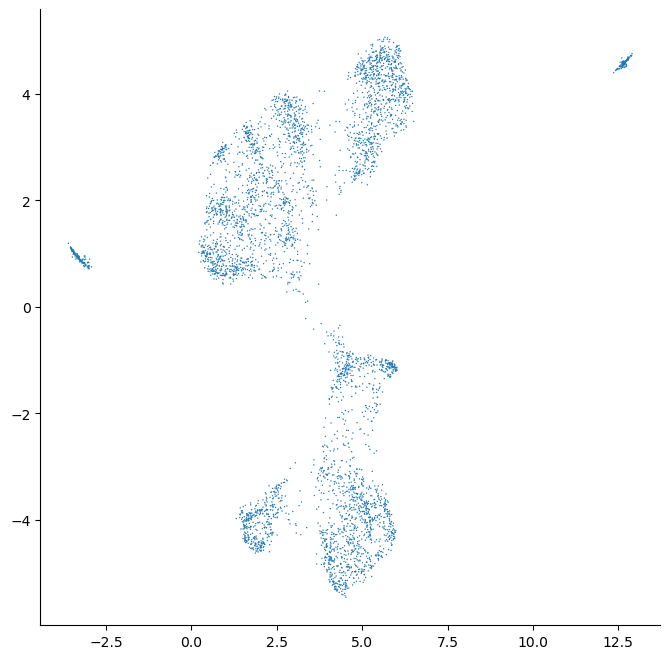

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(*embedding.T, s=1, edgecolor="none")
sns.despine()

In [19]:
# Define a list of genes that interest you
dopamine_genes = ['Th', 'Ddc', 'Slc6a3', 'Drd1', 'Drd2', 'Drd3', 'Drd4', 'Drd5']

# Filter out the data that contains these genes
dopamine_gene_data = gene_data.loc[gene_data.index.isin(dopamine_genes)]

In [20]:
dopamine_gene_data

PS0810_E1-50_S88  PS0817_E1-50_S19  PS0817_E1-50_S25  \
Ddc             0.000000               0.0          0.000000   
Drd1            0.000000               0.0          0.000000   
Drd2            0.000000               0.0          0.000000   
Drd3            1.014430               0.0          1.698996   
Drd4            0.000000               0.0          0.000000   
Drd5            0.000000               0.0          0.000000   
Slc6a3         12.173163               0.0          0.000000   
Th              0.000000               0.0          0.000000   

        PS0817_E1-50_S26  PS0817_E1-50_S27  PS0817_E1-50_S28  \
Ddc             0.000000          0.000000          0.000000   
Drd1            0.000000         77.794021          3.325137   
Drd2            1.879501          0.000000          0.000000   
Drd3            0.000000          0.000000          1.662568   
Drd4            0.000000          0.000000          0.000000   
Drd5            0.000000          0.000000          0.000000   
Slc6a3          0.000000          0.000000          0.000000   
Th              0.000000          0.000000          0.000000   

        PS0817_E1-50_S46  PS0817_E1-50_S52  PS0830_E1-50_S17  \
Ddc             6.143072          0.000000               0.0   
Drd1            0.000000          9.173681               0.0   
Drd2            0.000000          2.293420               0.0   
Drd3            0.000000          0.000000               0.0   
Drd4            0.000000          0.000000               0.0   
Drd5            0.000000          0.000000               0.0   
Slc6a3          0.000000          0.000000               0.0   
Th              0.000000          0.000000               0.0   

        PS0830_E1-50_S19  ...  SM-J39ZH_S561_E1-50  SM-J39ZH_S562_E1-50  \
Ddc                  0.0  ...             0.000000            21.062076   
Drd1                 0.0  ...             0.000000           128.478665   
Drd2                 0.0  ...             2.517053             0.000000   
Drd3                 0.0  ...             0.000000             0.000000   
Drd4                 0.0  ...             0.000000             0.000000   
Drd5                 0.0  ...             0.000000             0.000000   
Slc6a3               0.0  ...             0.000000             0.000000   
Th                   0.0  ...             0.000000             0.000000   

        SM-J39ZH_S565_E1-50  SM-J39ZH_S566_E1-50  SM-J39ZH_S571_E1-50  \
Ddc                     0.0             0.000000             17.47714   
Drd1                    0.0            67.605539             69.90856   
Drd2                    0.0             0.000000              0.00000   
Drd3                    0.0             0.000000              0.00000   
Drd4                    0.0             0.000000              0.00000   
Drd5                    0.0             0.000000              0.00000   
Slc6a3                  0.0             0.000000              0.00000   
Th                      0.0             0.000000              0.00000   

        SM-J39ZH_S576_E1-50  SM-J3A1L_S592_E1-50  SM-J3A1L_S593_E1-50  \
Ddc                0.000000                  0.0             0.000000   
Drd1               0.000000                  0.0           110.905641   
Drd2               0.000000                  0.0             0.000000   
Drd3               1.853407                  0.0             0.000000   
Drd4               0.000000                  0.0             0.000000   
Drd5               0.000000                  0.0             0.000000   
Slc6a3             0.000000                  0.0             0.000000   
Th                 0.000000                  0.0             0.000000   

        SM-J3A1L_S603_E1-50  SM-J3A1L_S604_E1-50  
Ddc                     0.0             0.000000  
Drd1                    0.0           190.708752  
Drd2                    0.0             0.000000  
Drd3                    0.0             0.000000  
Drd4                    0.0   

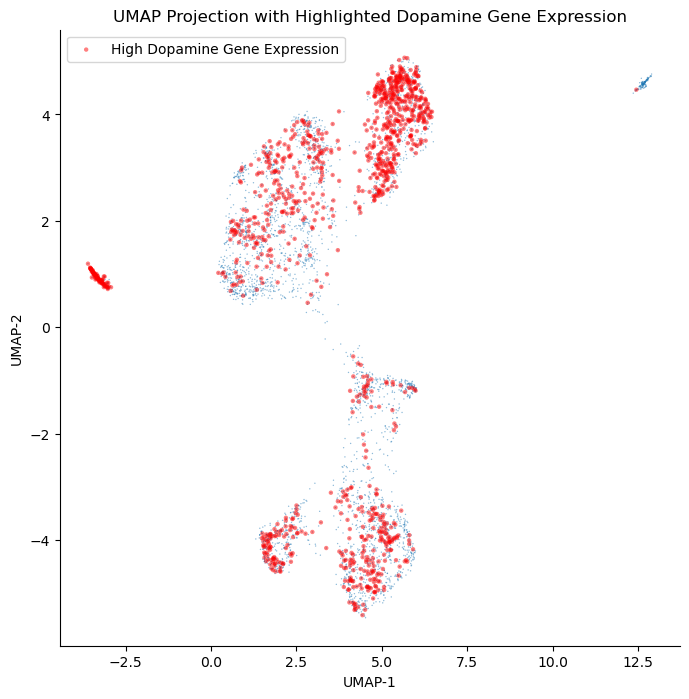

In [26]:
dopamine_expression = gene_data.loc[dopamine_genes]
# The 75% quantile threshold of dopamine receptor gene expression was calculated
threshold = dopamine_expression.mean(axis=0).quantile(0.75)

# Creates a Boolean index array representing samples at levels above the threshold
high_expression_mask = (dopamine_expression.mean(axis=0) > threshold)

# Suppose you have calculated the average expression level of the dopamine receptor gene from the gene expression dataset
# and creates a Boolean index array of samples representing levels above a certain threshold
threshold = dopamine_expression.mean(axis=0).quantile(0.75)
high_expression_mask = (dopamine_expression.mean(axis=0) > threshold)  # 阈值根据数据调整

# UMAP is drawn again to highlight samples with high dopamine gene expression
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=1, edgecolor="none", alpha=0.5)  # 所有样本
plt.scatter(embedding[high_expression_mask, 0], embedding[high_expression_mask, 1], color='red', s=10, edgecolor='none',alpha=0.5, label='High Dopamine Gene Expression')  # 突出显示
sns.despine()  # 移除图框线
plt.title('UMAP Projection with Highlighted Dopamine Gene Expression')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend()
plt.show()


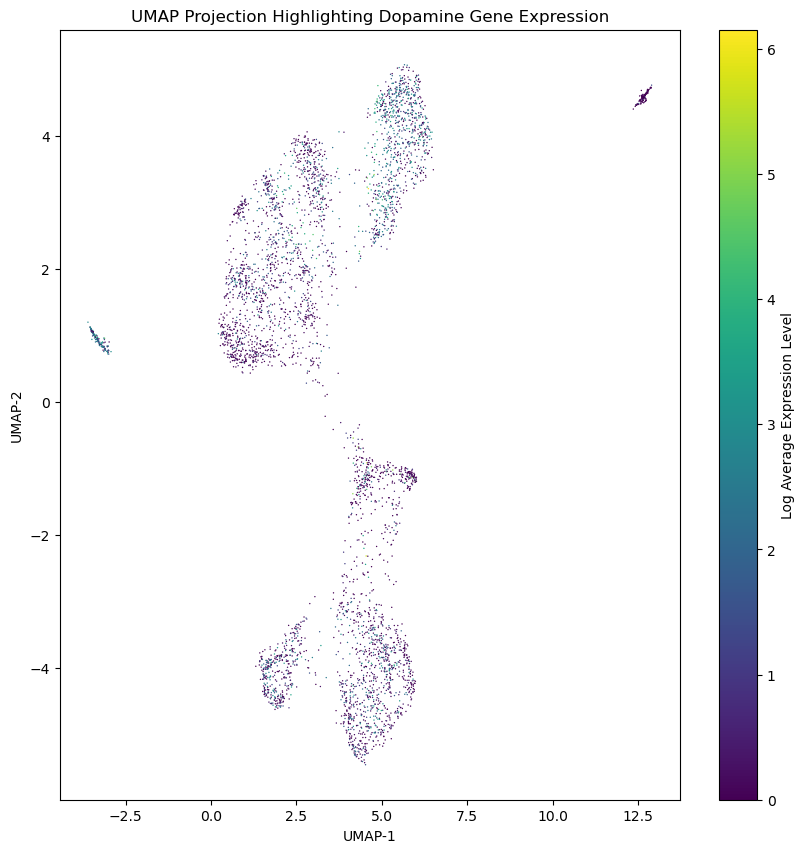

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 'gene_data' contains the gene expression data of all samples
dopamine_genes = ['Th', 'Ddc', 'Slc6a3', 'Drd1', 'Drd2', 'Drd3', 'Drd4', 'Drd5']
dopamine_expression = gene_data.loc[dopamine_genes]

# The average expression level of dopamine gene was calculated
average_expression = dopamine_expression.mean(axis=0)

# For more vivid visualizations, logarithmic conversion of the expression level is possible (optional)
log_expression = np.log1p(average_expression)


cmap = sns.color_palette("viridis", as_cmap=True)

plt.figure(figsize=(10, 10))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=1,  
    c=log_expression, 
    cmap=cmap,  
    edgecolor="none"
)

# Add color bar
plt.colorbar(label='Log Average Expression Level')

# Set the chart title and axis labels
plt.title('UMAP Projection Highlighting Dopamine Gene Expression')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.show()


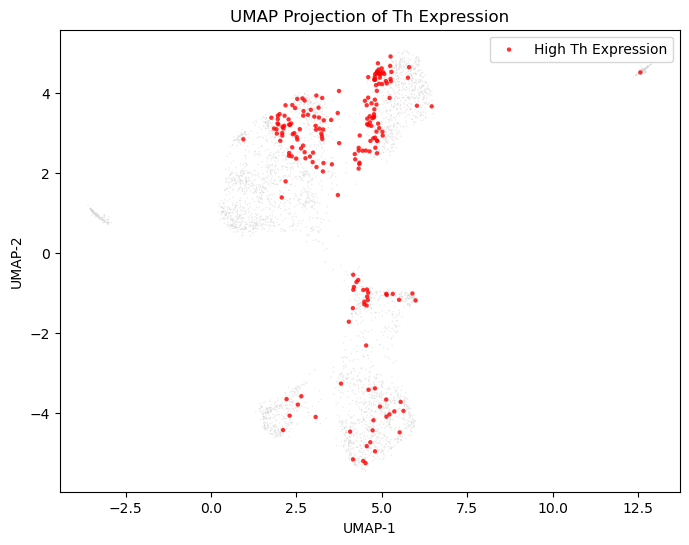

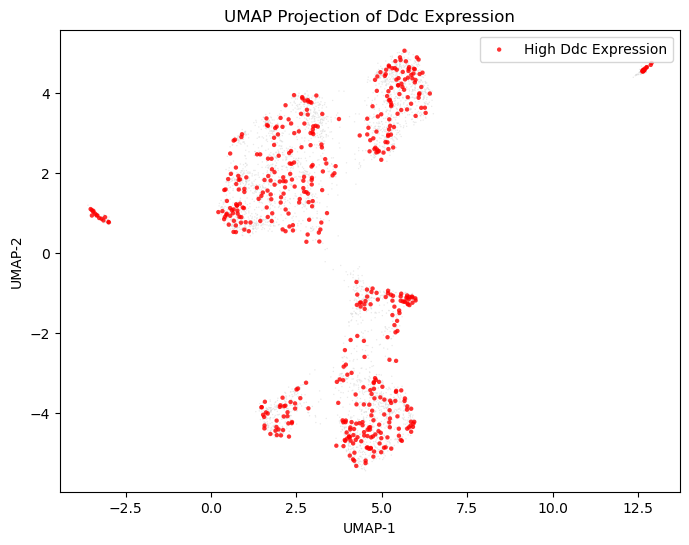

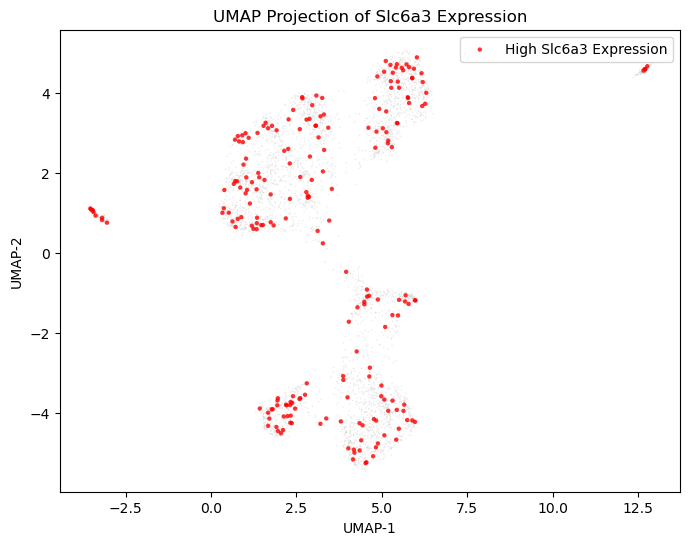

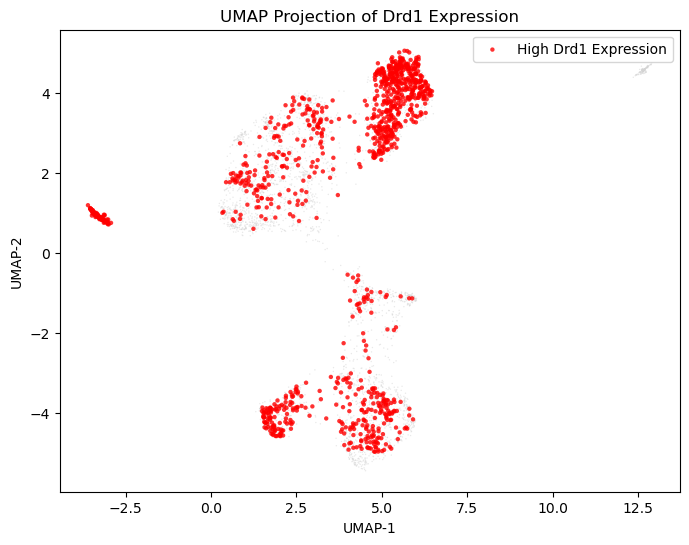

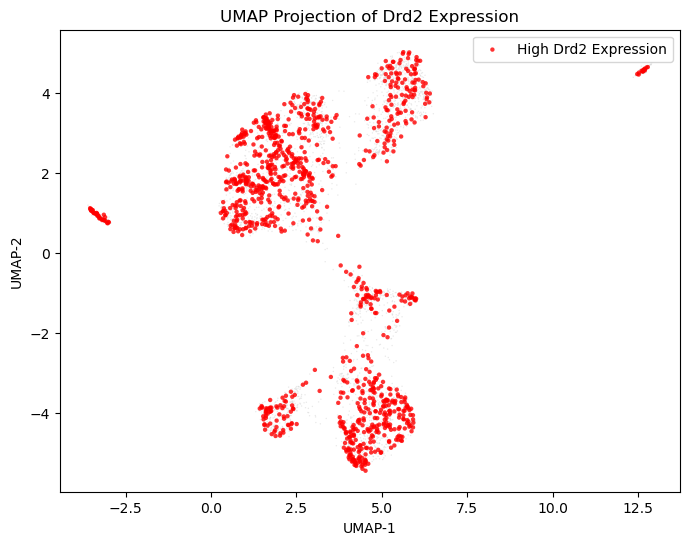

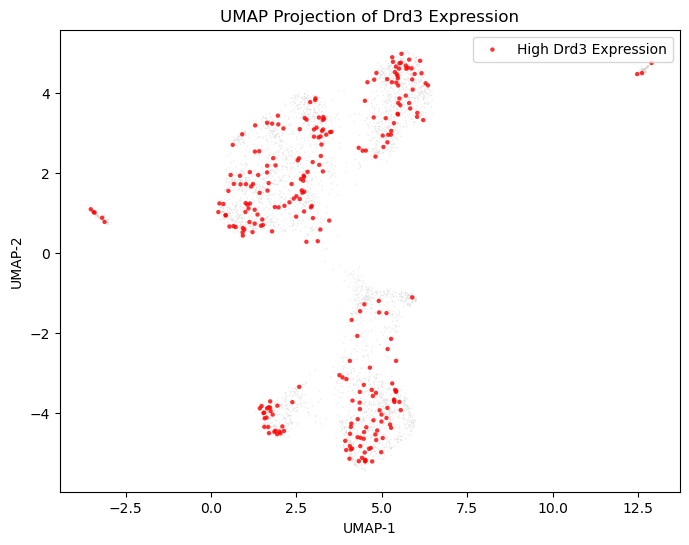

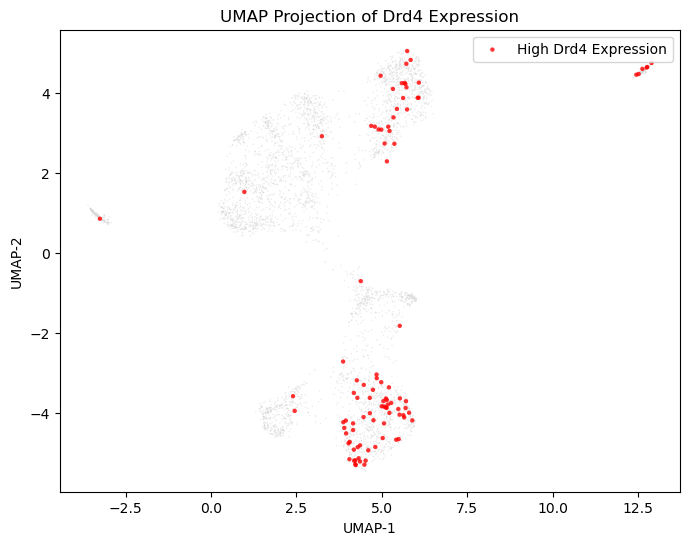

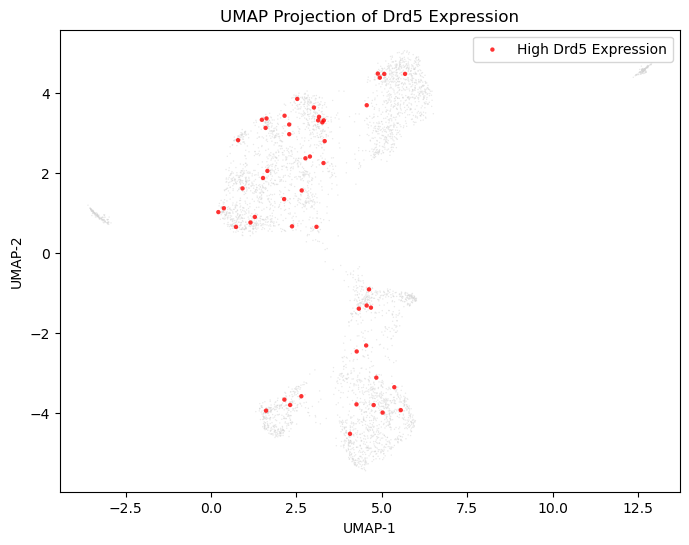

In [30]:
for gene in dopamine_genes:
    expression = dopamine_expression.loc[gene]
    threshold = expression.quantile(0.75)  
    high_expression_mask = expression > threshold  # 高表达的样本索引

    plt.figure(figsize=(8, 6))
    plt.scatter(embedding[:, 0], embedding[:, 1], color='lightgray', s=1, edgecolor='none', alpha=0.5)  # 所有样本
    plt.scatter(embedding[high_expression_mask, 0], embedding[high_expression_mask, 1], color='red', s=10, edgecolor='none', alpha=0.8, label=f'High {gene} Expression')  # 突出显示高表达样本
    plt.title(f'UMAP Projection of {gene} Expression')
    plt.xlabel('UMAP-1')
    plt.ylabel('UMAP-2')
    plt.legend()
    plt.show()

In [31]:
# 获取 'T-type Label' 列中所有唯一的值
unique_labels = metadata['T-type Label'].unique()

# 打印不同类型的数量和具体类型
print(f"Total unique 'T-type Label' types: {len(unique_labels)}")
print("Unique 'T-type Label' types:", unique_labels)

# 或者更直接地使用 nunique() 函数来计算唯一值的数量
unique_count = metadata['T-type Label'].nunique()
print(f"Total unique 'T-type Label' types using nunique(): {unique_count}")


Total unique 'T-type Label' types: 63
Unique 'T-type Label' types: ['Vip Gpc3 Slc18a3' 'Sst Tac2 Myh4' 'Sst Calb2 Pdlim5' 'Sst Hpse Cbln4'
 'Sst Calb2 Necab1' 'Sst Esm1' 'Vip Pygm C1ql1' 'Vip Lmo1 Myl1'
 'Vip Crispld2 Kcne4' 'Pvalb Tpbg' 'Pvalb Vipr2' 'Vip Rspo4 Rxfp1 Chat'
 'Pvalb Reln Itm2a' 'Sst Tac1 Tacr3' nan 'Sst Tac1 Htr1d'
 'Sst Hpse Sema3c' 'Sst Rxfp1 Prdm8' 'Sst Myh8 Etv1 ' 'Vip Col15a1 Pde1a'
 'Vip Ptprt Pkp2' 'Lamp5 Lsp1' 'Vip Chat Htr1f' 'Sncg Vip Itih5'
 'Vip Lect1 Oxtr' 'Vip Igfbp6 Car10' 'Vip Igfbp4 Mab21l1'
 'Lamp5 Ntn1 Npy2r' 'Pvalb Sema3e Kank4' 'Vip Rspo1 Itga4' 'Pvalb Th Sst'
 'Vip Crispld2 Htr2c' 'Vip Lmo1 Fam159b' 'Sst Rxfp1 Eya1'
 'Pvalb Gpr149 Islr' 'Lamp5 Fam19a1 Tmem182' 'Sst Mme Fam114a1'
 'Sst Chodl' 'Sst Crh 4930553C11Rik ' 'Sst Nr2f2 Necab1'
 'Lamp5 Plch2 Dock5' 'Vip Igfbp6 Pltp' 'Serpinf1 Clrn1'
 'Serpinf1 Aqp5 Vip' 'Sst Myh8 Fibin' 'Sncg Vip Nptx2' 'Sst Tac2 Tacstd2'
 'Lamp5 Krt73' 'Pvalb Calb1 Sst' 'Pvalb Akr1c18 Ntf3' 'Pvalb Gabrg1'
 'Pvalb Reln Tac1'

In [32]:
t_type_label = "Pvalb Gabrg1"
selected_metadata = metadata[metadata["T-type Label"] == t_type_label]
selected_samples = selected_metadata["transcriptomics_sample_id"].tolist()
sample_mask = gene_data.columns.isin(selected_samples)

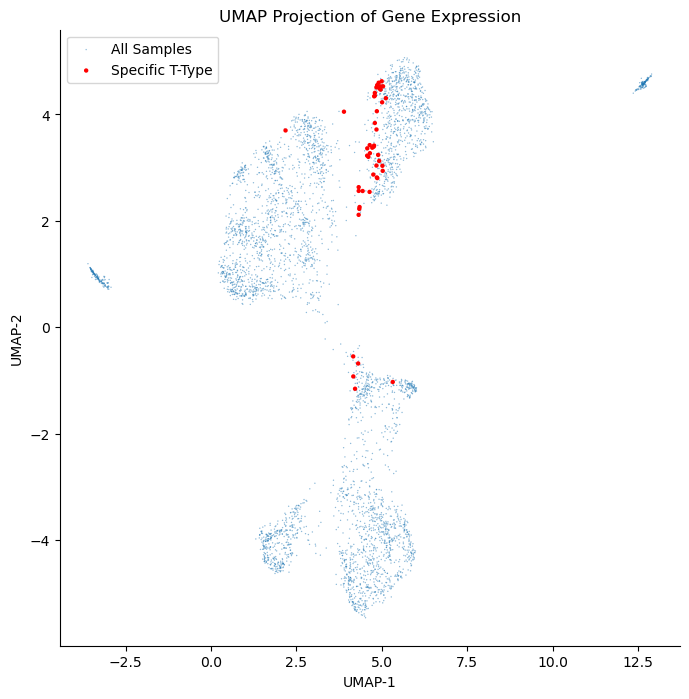

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 embedding 是用 UMAP 得到的降维结果，且已正确计算
plt.figure(figsize=(8, 8))

# 绘制所有样本
plt.scatter(embedding[:, 0], embedding[:, 1], s=1, edgecolor="none", alpha=0.5, label='All Samples')

# 如果你想突出显示特定 T-type 的样本
# 假设 sample_mask 是一个确定哪些样本属于特定 T-type 的布尔数组
plt.scatter(embedding[sample_mask, 0], embedding[sample_mask, 1], color='red', s=10, edgecolor='none', label='Specific T-Type')

plt.title('UMAP Projection of Gene Expression')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend()

sns.despine()  # 使用 seaborn 的 despine 函数去除边框
plt.show()


In [66]:
import pandas as pd


# Merge gene expression data and metadata
combined_data = pd.merge(gene_data.transpose(), metadata, left_index=True, right_on='transcriptomics_sample_id')

# Dopamine-related genes of interest
#dopamine_genes = [ 'Th']

dopamine_genes = ['Th', 'Ddc', 'Slc6a3', 'Drd1', 'Drd2', 'Drd3', 'Drd4', 'Drd5']
#dopamine_genes_1 = [ 'Drd1']
dopamine_genes_1 = [ 'Drd1']
# Calculate the average dopamine gene expression level for each T-type
grouped_data = combined_data.groupby('T-type Label')[dopamine_genes].mean()
grouped_data_1 = combined_data.groupby('T-type Label')[dopamine_genes_1].mean()

In [67]:
# 计算每个T-type多巴胺基因的总平均表达
grouped_data['mean_expression'] = grouped_data.mean(axis=1)
# 对T-type按平均表达进行排序
sorted_t_types = grouped_data.sort_values(by='mean_expression', ascending=False)
print(sorted_t_types)


                            Th        Ddc    Slc6a3       Drd1       Drd2  \
T-type Label                                                                
Pvalb Gabrg1        464.788631   2.385516  0.014514  39.646808   0.219223   
Sst Nts             237.636483  12.454294  3.736882  23.239265  12.885478   
Pvalb Th Sst         80.703775   0.853052  0.054351  49.678290   0.270188   
Sst Chodl             0.110928   0.984729  0.263654  85.475846   1.187521   
Pvalb Gpr149 Islr    43.433723   0.000000  0.492897  36.168933   0.244011   
...                        ...        ...       ...        ...        ...   
Lamp5 Krt73           0.080957   0.000000  2.995427   0.169296   0.087959   
Vip Igfbp6 Pltp       0.000000   0.000000  0.621285   0.621285   0.864775   
Sst Chrna2 Ptgdr      1.259307   0.089888  0.079051   0.000000   0.498110   
Lamp5 Fam19a1 Pax6    0.000000   0.135444  0.135444   0.000000   0.154812   
L2/3 IT VISp Agmat    0.000000   0.000000  0.000000   0.000000   0.000000   

In [68]:
# The total average expression of each T-type dopamine gene was calculated
grouped_data_1['mean_expression_1'] = grouped_data_1.mean(axis=1)

# Sort T-types by average expression
sorted_t_types_1 = grouped_data_1.sort_values(by='mean_expression_1', ascending=False)
print(sorted_t_types_1)


                         Drd1  mean_expression_1
T-type Label                                    
Sst Chodl           85.475846          85.475846
Pvalb Reln Itm2a    65.411011          65.411011
Pvalb Sema3e Kank4  64.969518          64.969518
Serpinf1 Aqp5 Vip   59.788630          59.788630
Pvalb Tpbg          50.429945          50.429945
...                       ...                ...
Lamp5 Fam19a1 Pax6   0.000000           0.000000
Vip Gpc3 Slc18a3     0.000000           0.000000
Sst Chrna2 Ptgdr     0.000000           0.000000
Meis2 Adamts19       0.000000           0.000000
L2/3 IT VISp Agmat   0.000000           0.000000

[62 rows x 2 columns]


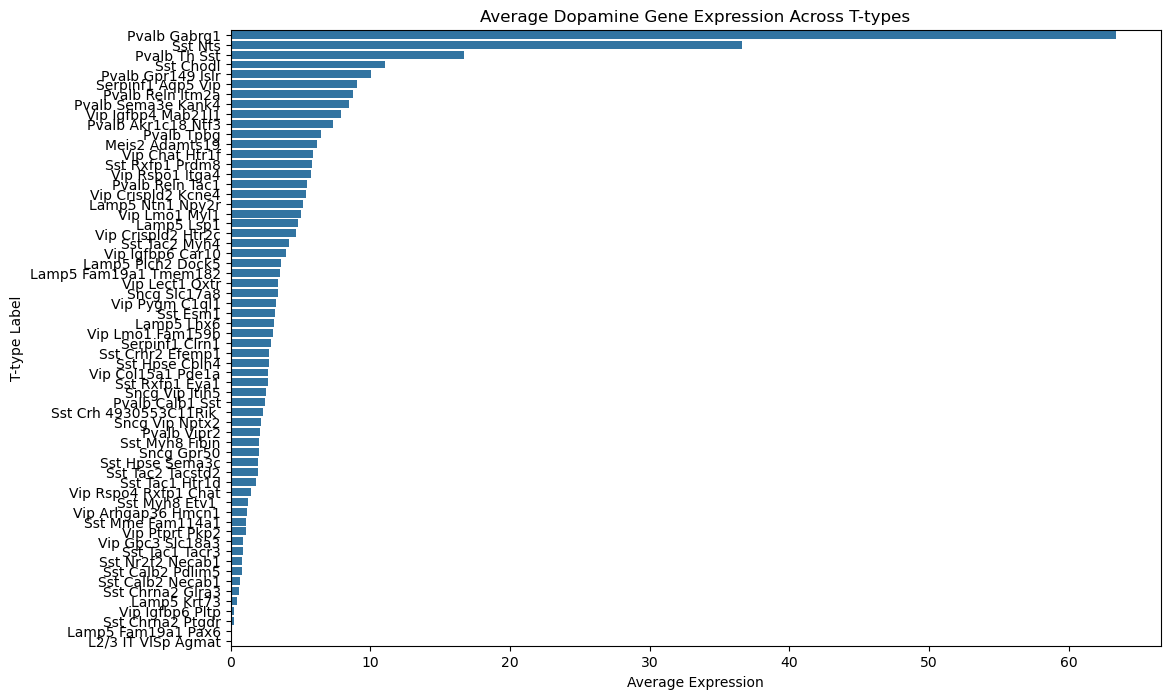

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# A bar graph was drawn to show the total average expression of dopamine genes for each T-type
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_expression', y=sorted_t_types.index, data=sorted_t_types)
plt.title('Average Dopamine Gene Expression Across T-types')
plt.xlabel('Average Expression')
plt.ylabel('T-type Label')
plt.show()


In [70]:
# 'gene_expression_summary' contains the above data
top_five_t_types = grouped_data.nlargest(5, 'mean_expression').index
bottom_five_t_types = grouped_data.nsmallest(5, 'mean_expression').index

# Merge the first five and last five T-type tags
selected_t_types = top_five_t_types.union(bottom_five_t_types)


In [71]:
# Gets the sample identifier for the selected T-type
selected_metadata = metadata[metadata['T-type Label'].isin(selected_t_types)]

# Generate the sample mask
selected_mask = gene_data.columns.isin(selected_metadata["transcriptomics_sample_id"].tolist())


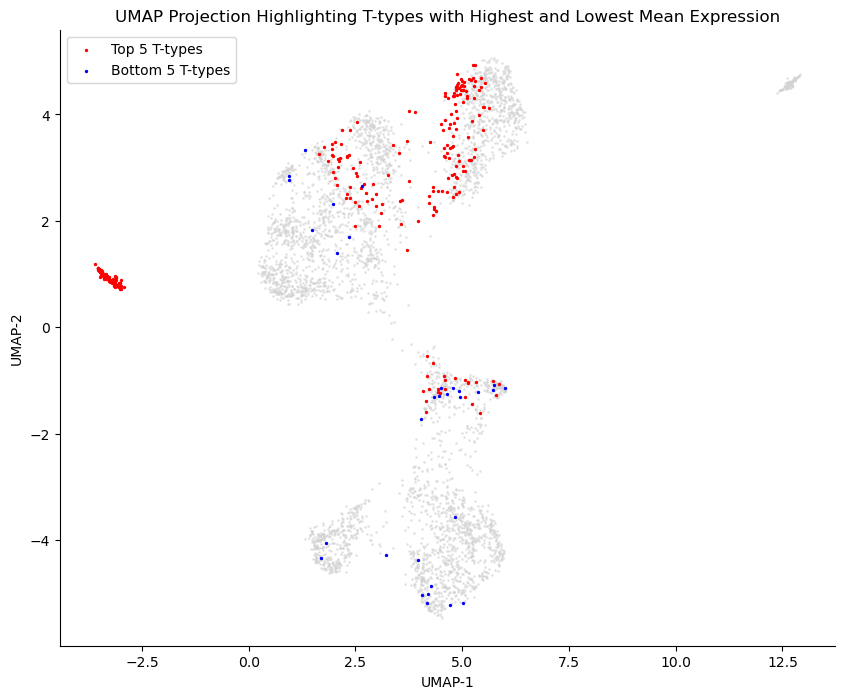

In [72]:
# Set canvas
plt.figure(figsize=(10, 8))

# Draw the background of all samples
plt.scatter(*embedding.T, s=1, color='lightgray', alpha=0.5)

# Draw T-types expressing the top five concentrations
top_mask = gene_data.columns.isin(metadata[metadata['T-type Label'].isin(top_five_t_types)]["transcriptomics_sample_id"].tolist())
plt.scatter(*embedding[top_mask, :].T, s=2, color='red', label='Top 5 T-types')

# Draw a T-type that expresses the last five concentrations
bottom_mask = gene_data.columns.isin(metadata[metadata['T-type Label'].isin(bottom_five_t_types)]["transcriptomics_sample_id"].tolist())
plt.scatter(*embedding[bottom_mask, :].T, s=2, color='blue', label='Bottom 5 T-types')


plt.legend()
plt.title('UMAP Projection Highlighting T-types with Highest and Lowest Mean Expression')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
sns.despine()

plt.show()


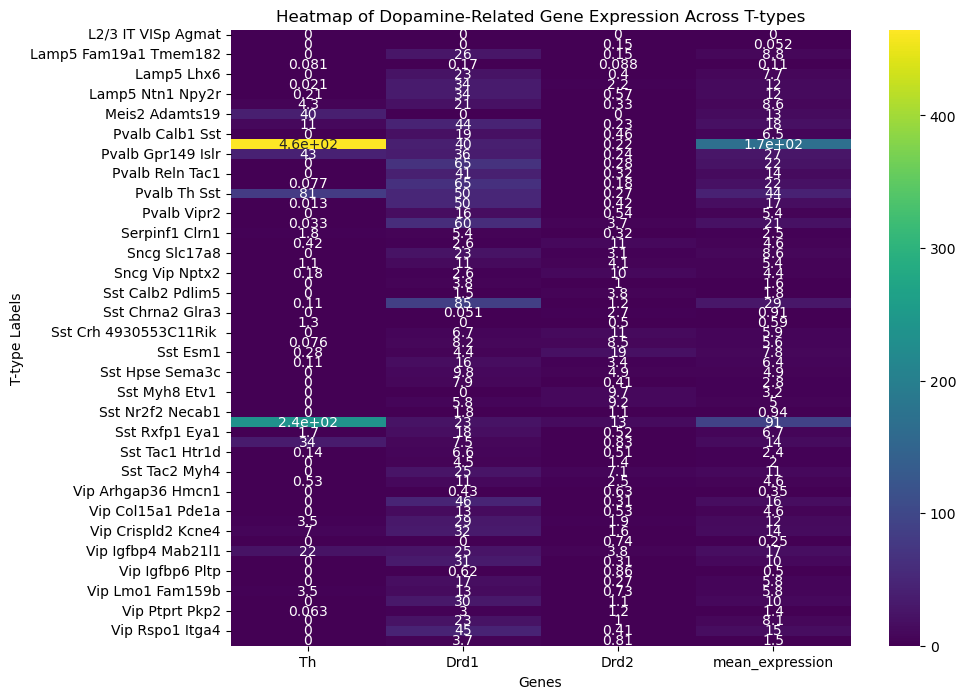

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设你已经有一个DataFrame `grouped_data` 包含了上面的数据
# 创建热图
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_data, annot=True, cmap='viridis')
plt.title('Heatmap of Dopamine-Related Gene Expression Across T-types')
plt.xlabel('Genes')
plt.ylabel('T-type Labels')
plt.show()



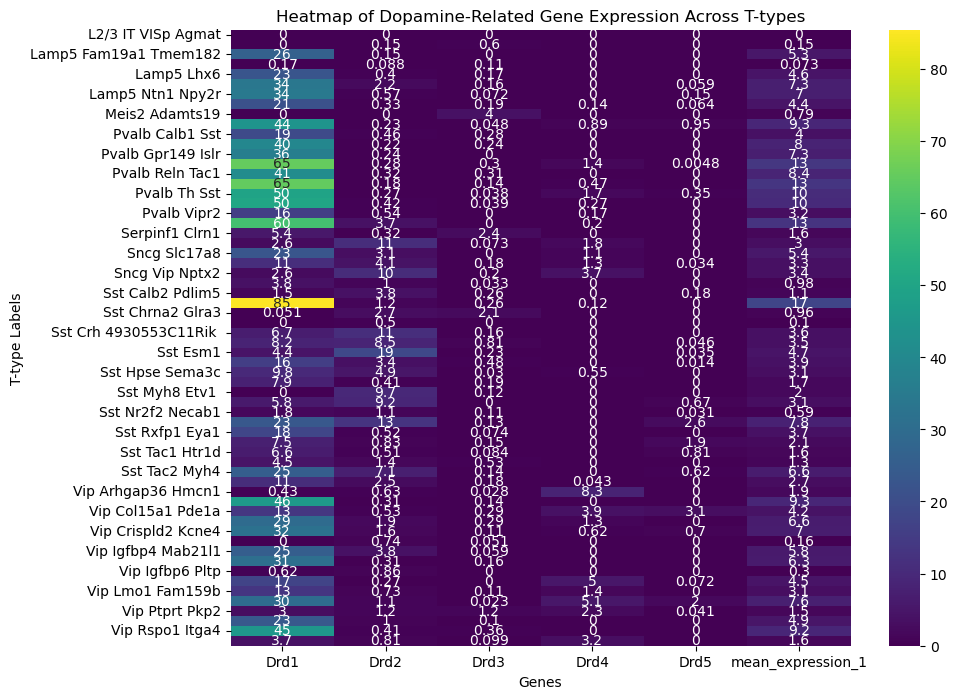

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设你已经有一个DataFrame `grouped_data` 包含了上面的数据
# 创建热图
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_data_1, annot=True, cmap='viridis')
plt.title('Heatmap of Dopamine-Related Gene Expression Across T-types')
plt.xlabel('Genes')
plt.ylabel('T-type Labels')
plt.show()



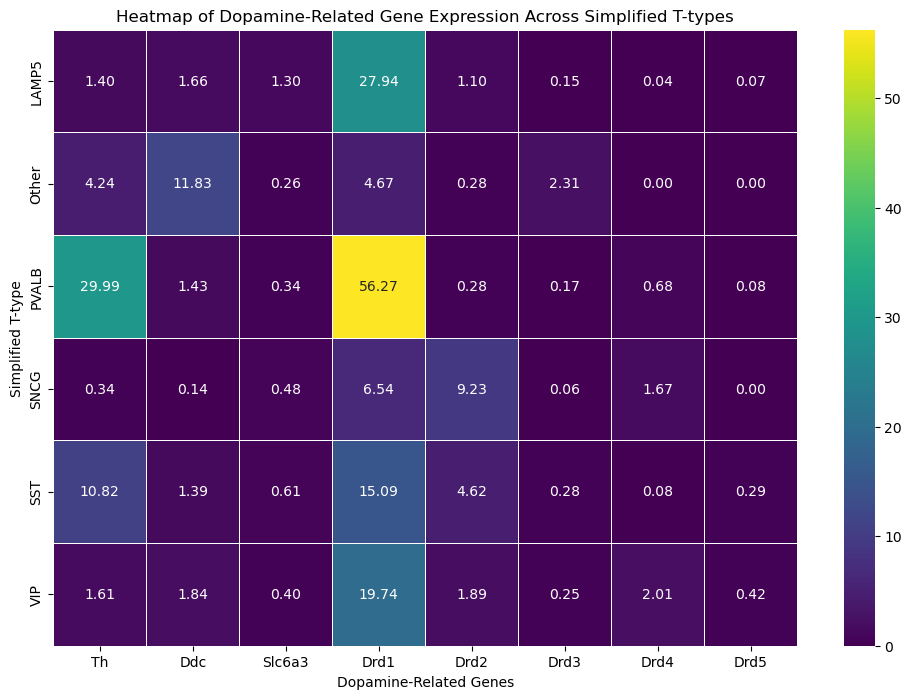

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 gene_data 已转置并且与 metadata 成功合并
# 使用简化的 T-type 来合并
combined_data = pd.merge(gene_data.transpose(), metadata, left_index=True, right_on='transcriptomics_sample_id')

# 感兴趣的多巴胺相关基因
dopamine_genes = ['Th', 'Ddc', 'Slc6a3', 'Drd1', 'Drd2', 'Drd3', 'Drd4', 'Drd5']

# 使用简化后的 T-type 计算每个T-type的多巴胺基因平均表达水平
grouped_data = combined_data.groupby('Simplified T-type')[dopamine_genes].mean()

# 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Dopamine-Related Gene Expression Across Simplified T-types')
plt.xlabel('Dopamine-Related Genes')
plt.ylabel('Simplified T-type')
plt.show()


In [23]:
# Identify the cells from a particular t-type (Pvalb Gabrg1)
my_ttype_metadata = metadata.loc[metadata["T-type Label"] == "Pvalb Gabrg1", :]

my_ttype_metadata

cell_specimen_id  \
project                        
mIVSCC-MET         645375521   
mIVSCC-MET         650402689   
mIVSCC-MET         657859611   
mIVSCC-MET         657860437   
mIVSCC-MET         669072736   
mIVSCC-MET         672977850   
mIVSCC-MET         679300054   
mIVSCC-MET         679590711   
mIVSCC-MET         679620100   
mIVSCC-MET         680048186   
mIVSCC-MET         680108584   
mIVSCC-MET         680121569   
mIVSCC-MET         688130343   
mIVSCC-MET         689211404   
mIVSCC-MET         689280134   
mIVSCC-MET         689797731   
mIVSCC-MET         694205841   
mIVSCC-MET         694335699   
mIVSCC-MET         694413065   
mIVSCC-MET         694419620   
mIVSCC-MET         694437359   
mIVSCC-MET         694474022   
mIVSCC-MET         694482319   
mIVSCC-MET         703271595   
mIVSCC-MET         703274727   
mIVSCC-MET         704276233   
mIVSCC-MET         712133949   
mIVSCC-MET         714493051   
mIVSCC-MET         715103050   
mIVSCC-MET         718475318   
mIVSCC-MET         727163311   
mIVSCC-MET         751932693   
mIVSCC-MET         754748254   
mIVSCC-MET         760988201   
mIVSCC-MET         765970060   
mIVSCC-MET         769884931   
mIVSCC-MET         778301240   
mIVSCC-MET         778308599   
mIVSCC-MET         806844075   
mIVSCC-MET         830348538   
mIVSCC-MET         830396905   
mIVSCC-MET         830850371   
mIVSCC-MET         830931428   
mIVSCC-MET         850989981   
mIVSCC-MET         872211286   
mIVSCC-MET         886426499   

                                           cell_specimen_name hemisphere  \
project                                                                    
mIVSCC-MET               Chrna2-Cre_OE25;Ai14-356148.04.02.01      right   
mIVSCC-MET  Crh-IRES-Cre_ZJH;Sst-IRES-FlpO;Ai65-362355.03....      right   
mIVSCC-MET                  Th-Cre_FI172;Ai14-363501.04.01.01       left   
mIVSCC-MET                  Th-Cre_FI172;Ai14-363501.04.02.01      right   
mIVSCC-MET                  Sst-IRES-Cre;Ai14-376206.04.02.02      right   
mIVSCC-MET               Chrna2-Cre_OE25;Ai14-379136.03.02.02      right   
mIVSCC-MET                  Th-Cre_FI172;Ai14-382502.03.02.01      right   
mIVSCC-MET                  Th-Cre_FI172;Ai14-382500.04.02.01      right   
mIVSCC-MET                  Th-Cre_FI172;Ai14-382500.03.02.01      right   
mIVSCC-MET                  Th-Cre_FI172;Ai14-382501.04.02.01      right   
mIVSCC-MET                  Th-Cre_FI172;Ai14-382501.04.01.02       left   
mIVSCC-MET                  Th-Cre_FI172;Ai14-382501.03.01.02       left   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-385997.04.01.02       left   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-385998.04.02.02      right   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-385998.02.02.01      right   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-385999.03.02.02      right   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-389709.02.01.01       left   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-389709.04.02.01      right   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-389710.04.02.01      right   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-389709.04.01.01       left   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-389709.05.02.01      right   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-389709.05.01.02       left   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-389709.02.02.02      right   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-391834.05.01.01       left   
mIVSCC-MET                  Sst-IRES-Cre;Ai14-392697.02.02.01      right   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-391840.04.02.03      right   
mIVSCC-MET    Pvalb-IRES-Cre;Th-P2A-FlpO;Ai65-396798.04.01.01       left   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-397196.04.02.02      right   
mIVSCC-MET                  Th-P2A-FlpO;Ai65F-397198.02.01.01       left   
mIVSCC-MET                  Sst-IRES-Cre;Ai14-400679.05.01.05       left   
mIVSCC-MET                  Sst-IRES-Cre;Ai

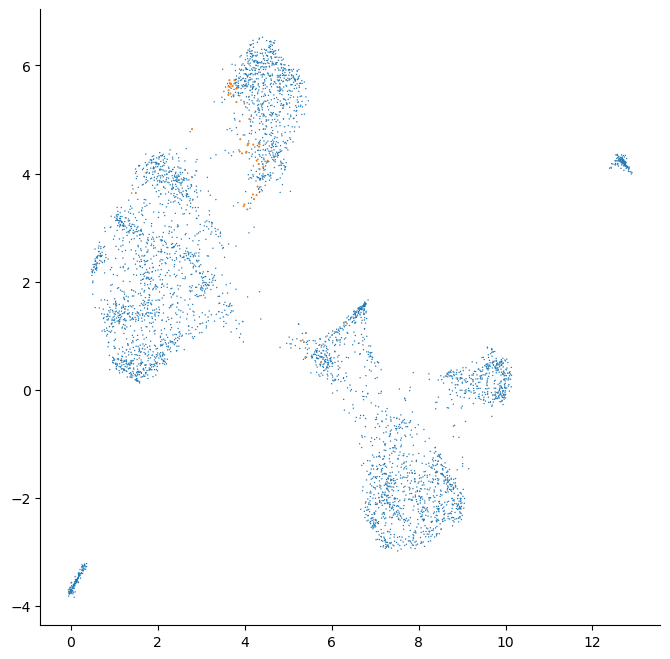

In [24]:
my_ttype_mask = gene_data.columns.isin(my_ttype_metadata["transcriptomics_sample_id"].tolist())

plt.figure(figsize=(8, 8))
plt.scatter(*embedding.T, s=1, edgecolor="none")
plt.scatter(*embedding[my_ttype_mask, :].T, s=2, edgecolor="none")
sns.despine()

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 metadata 是包含 'T-type Label' 的 DataFrame
# 假设 embedding 是使用 UMAP 计算得到的降维结果，每行对应 metadata 中的一行

unique_t_types = metadata['T-type Label'].dropna().unique()
colors = sns.color_palette("hsv", len(unique_t_types))  # 生成颜色

# 映射每个 T-type 到一个颜色
t_type_to_color = {t_type: color for t_type, color in zip(unique_t_types, colors)}


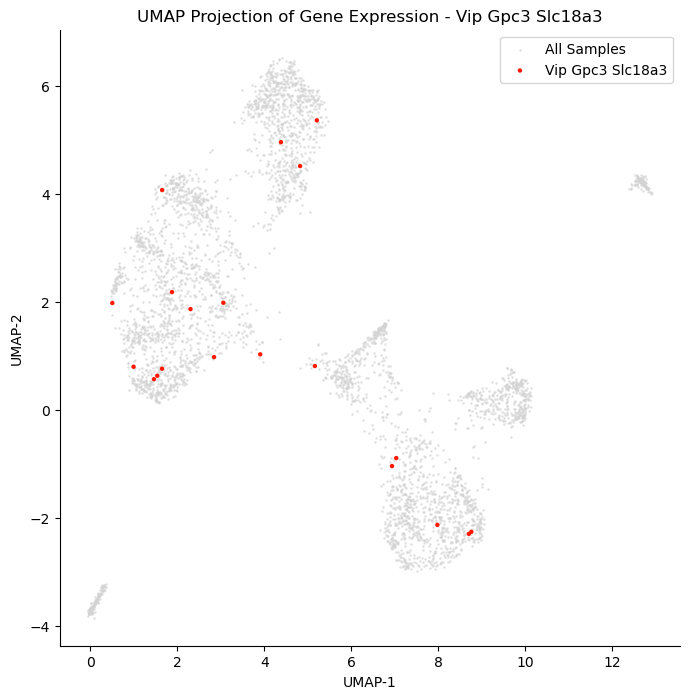

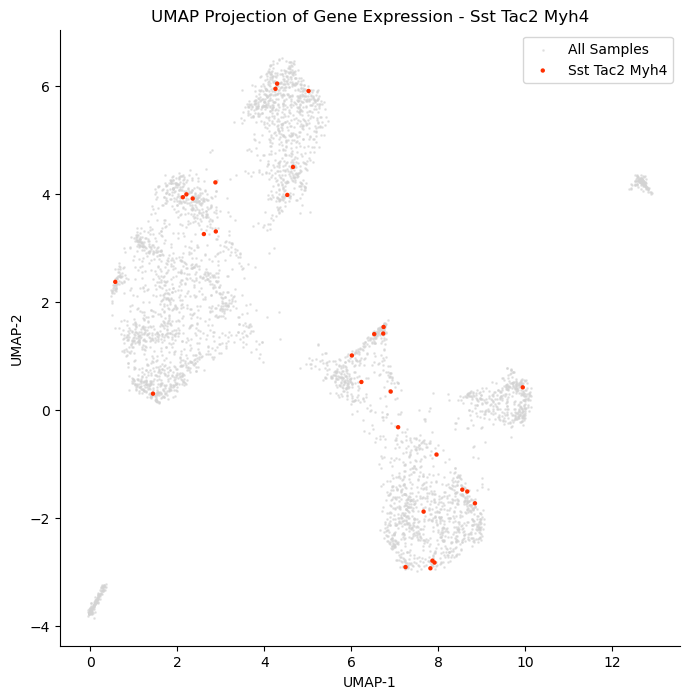

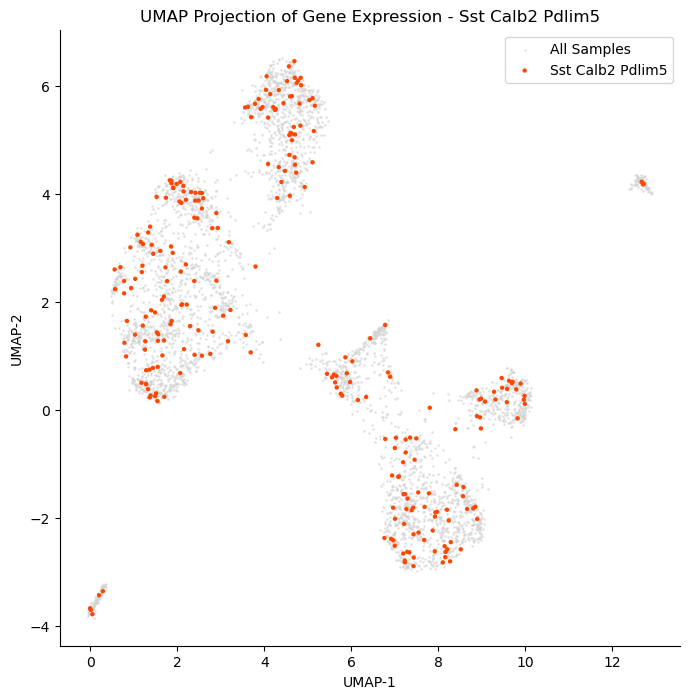

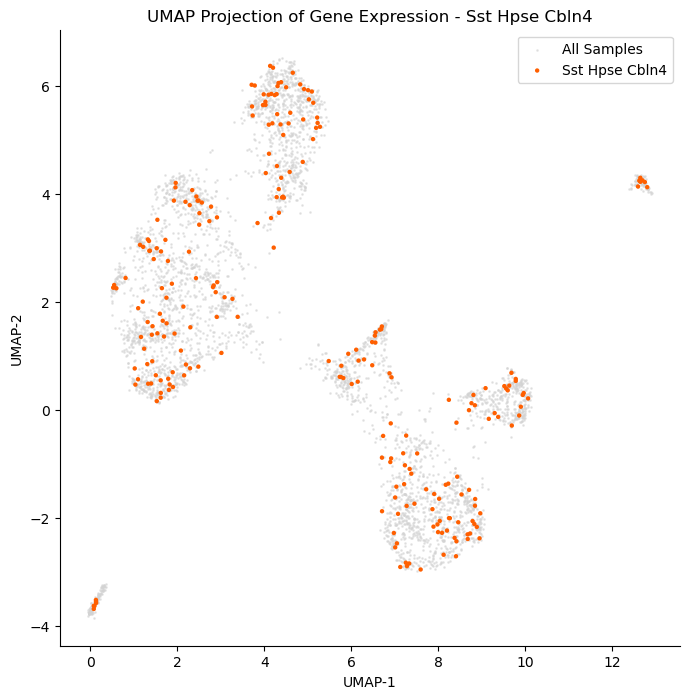

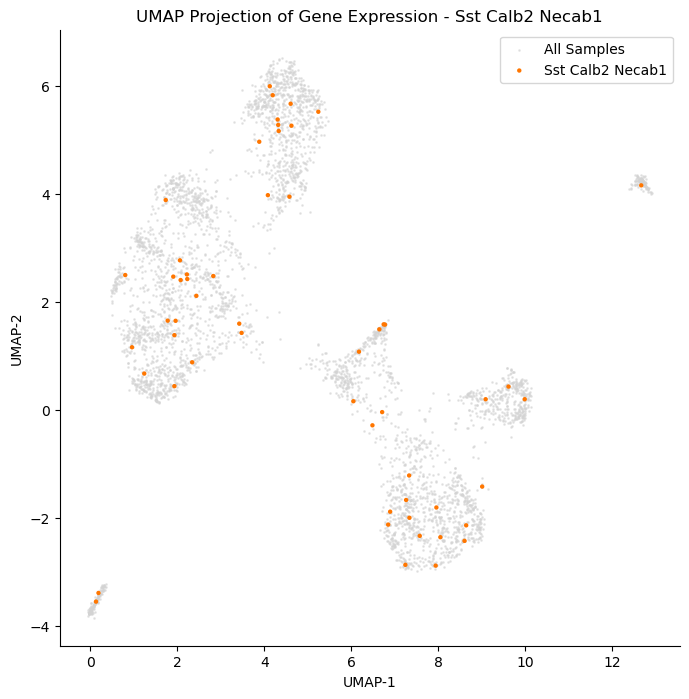

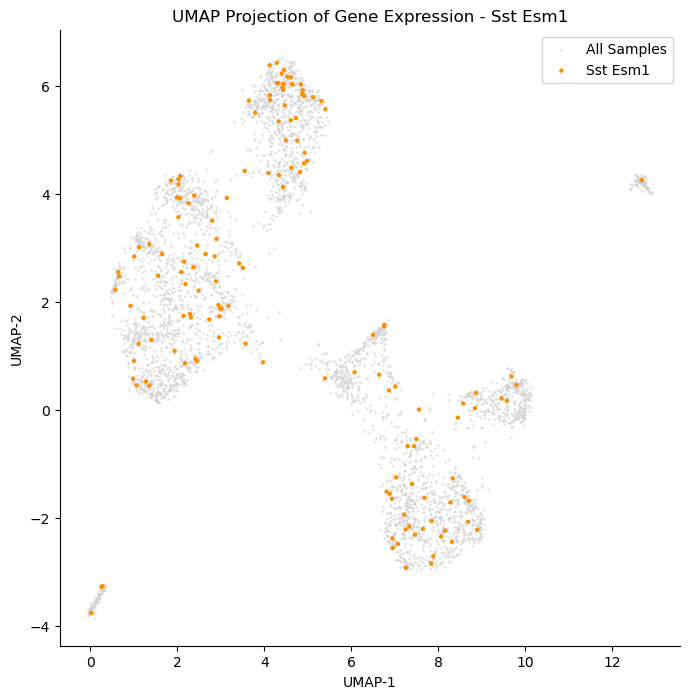

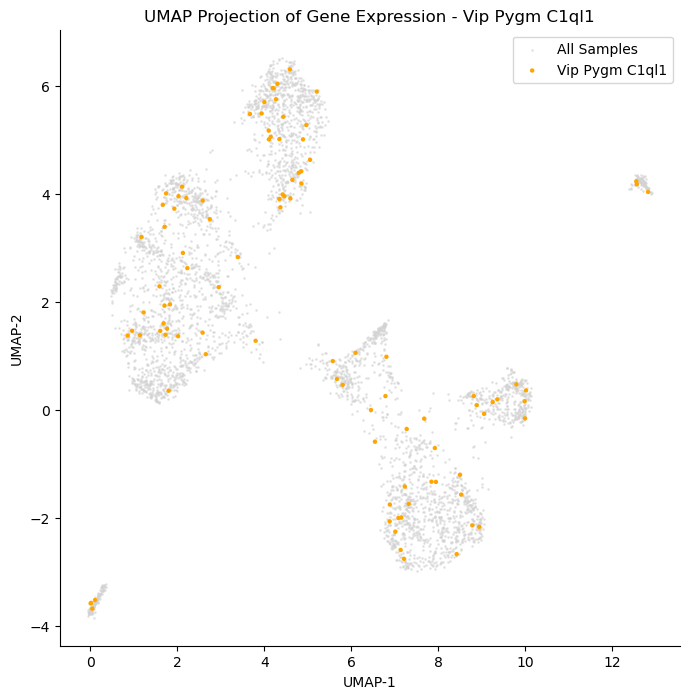

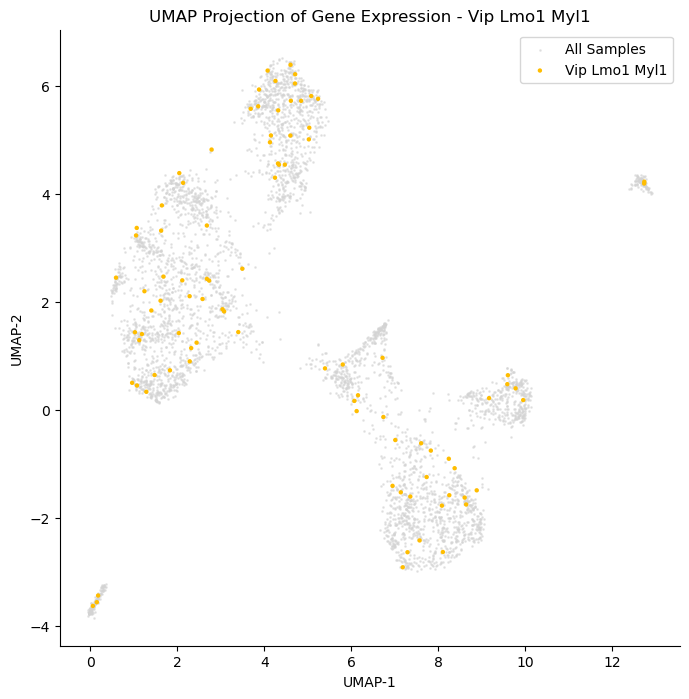

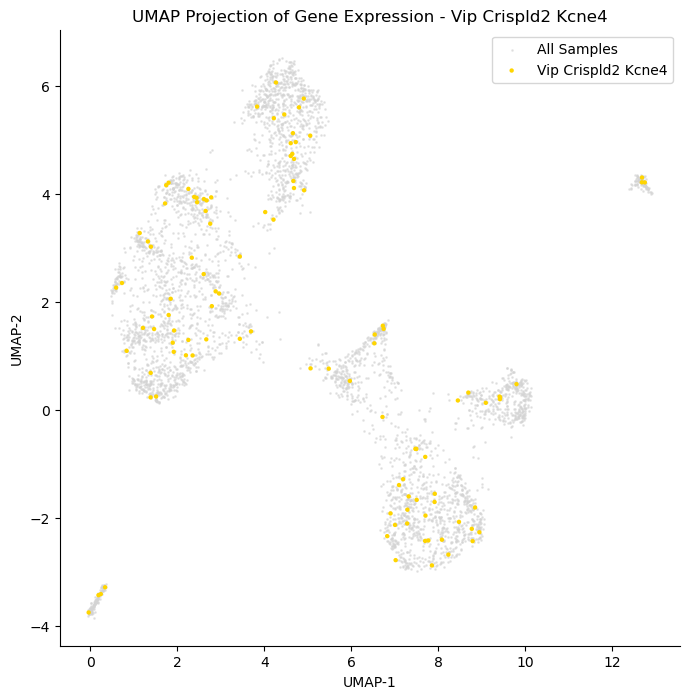

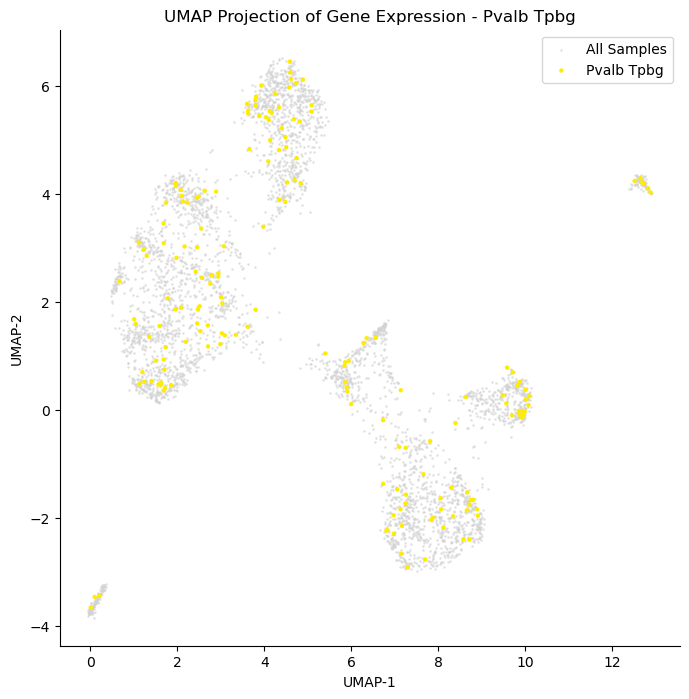

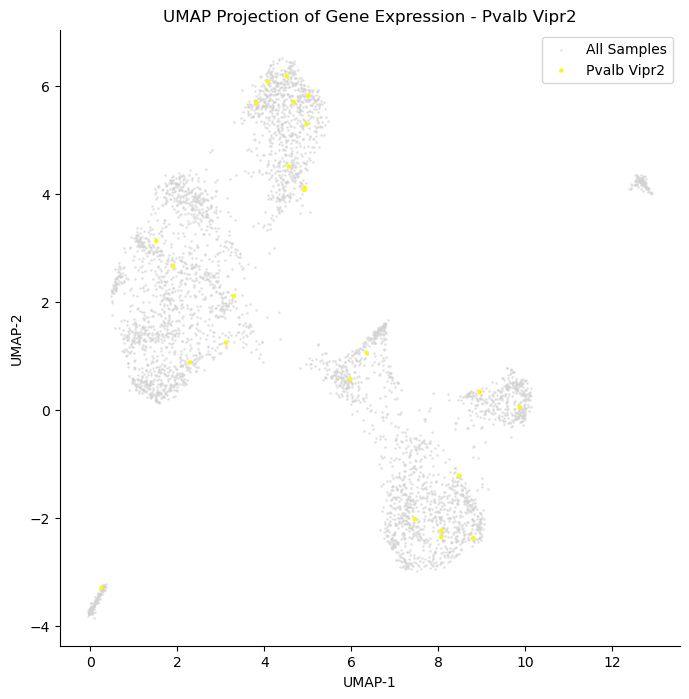

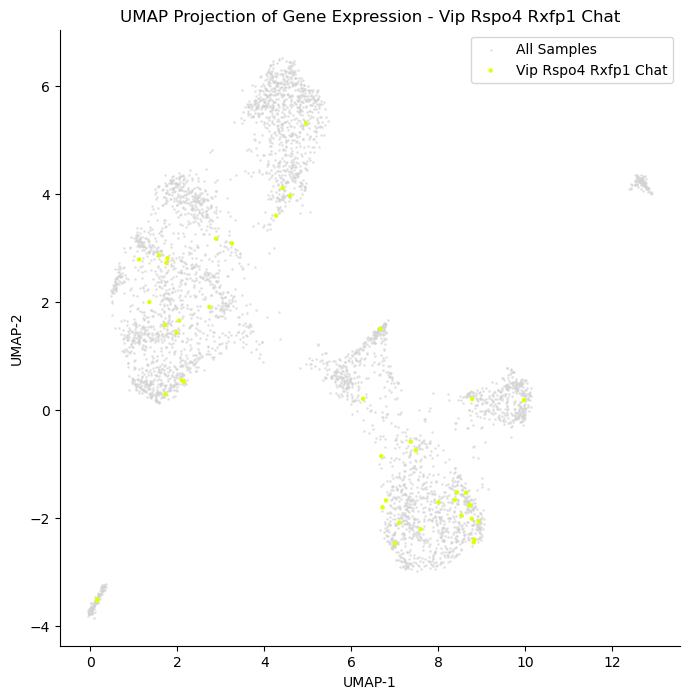

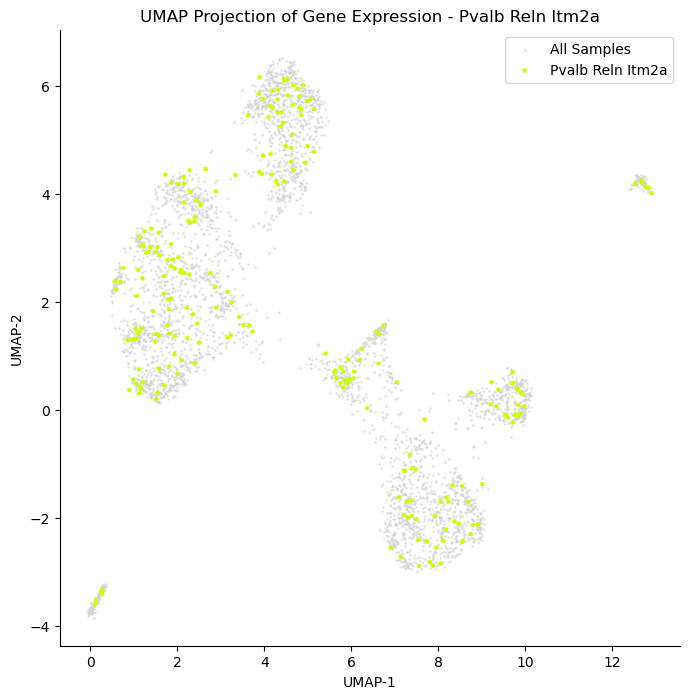

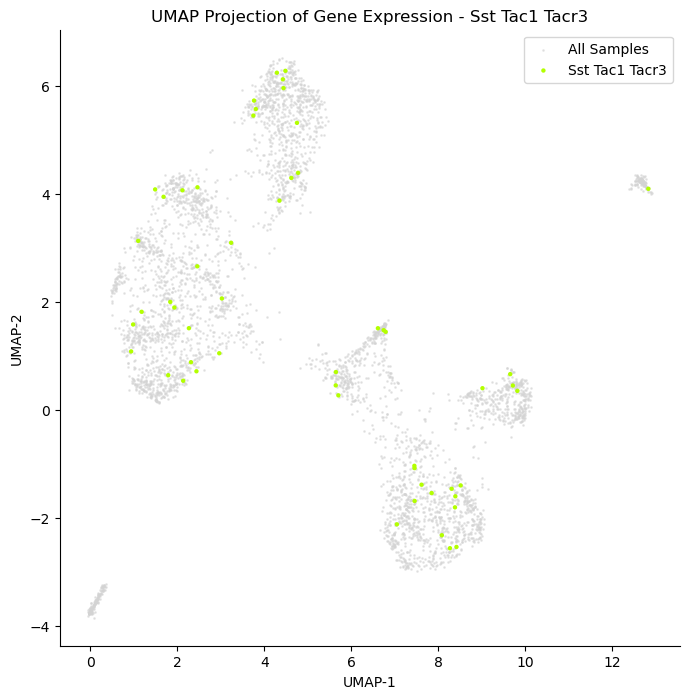

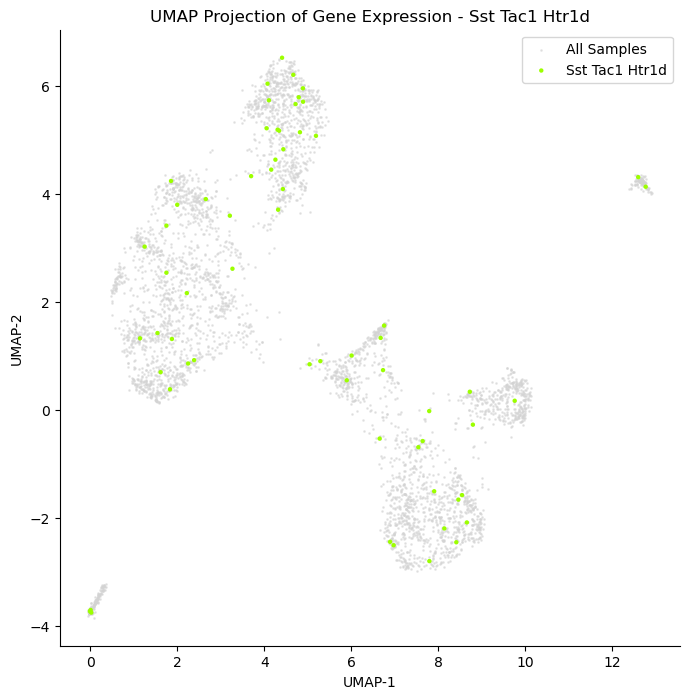

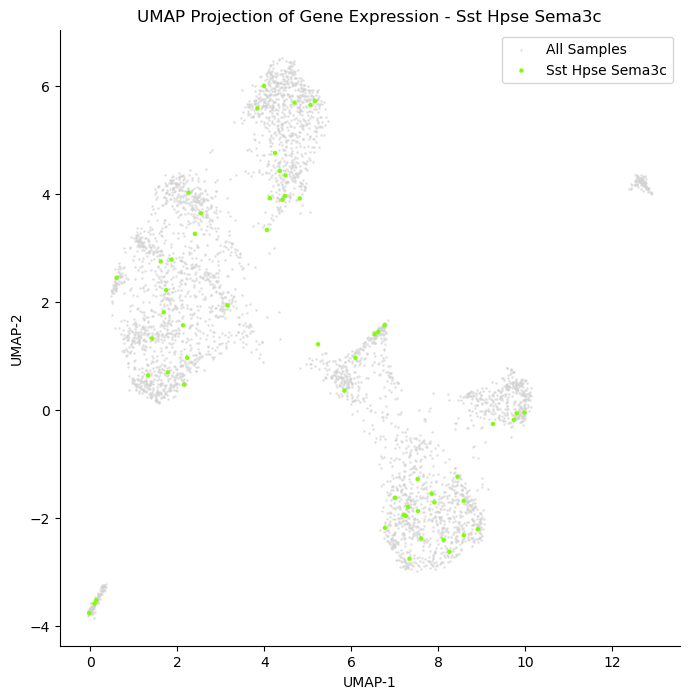

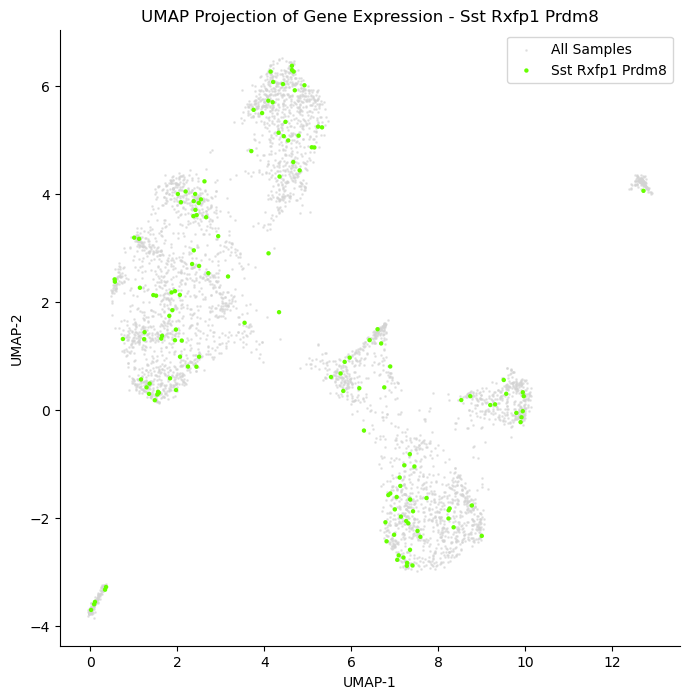

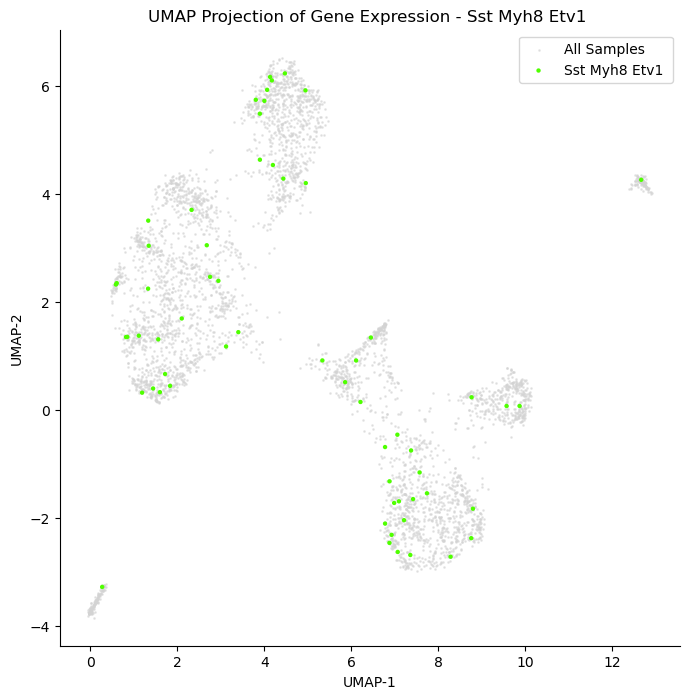

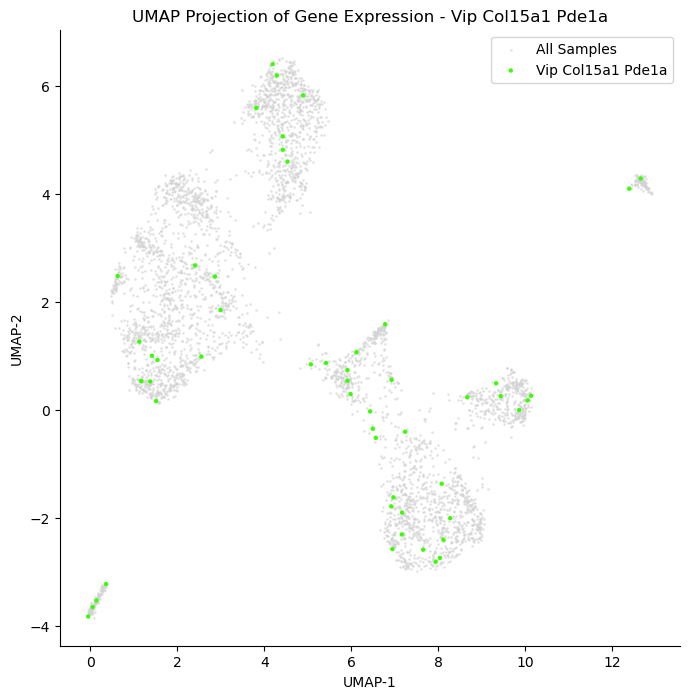

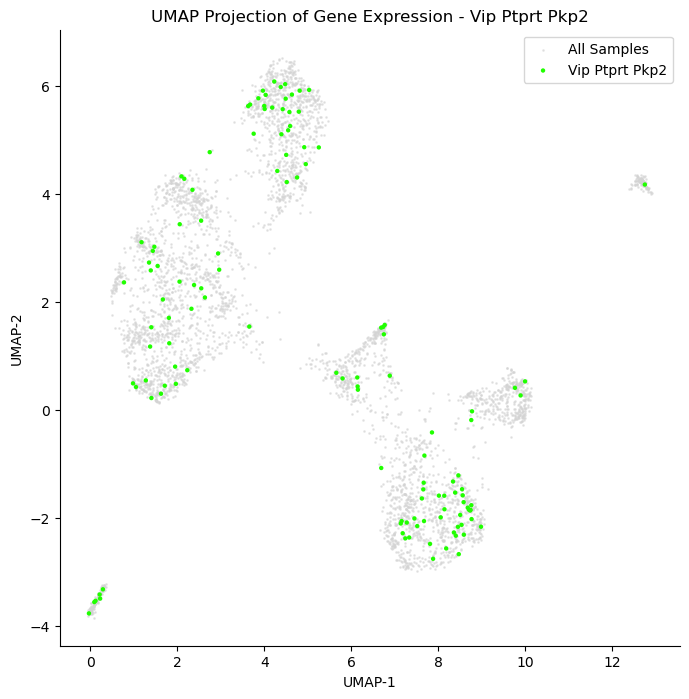

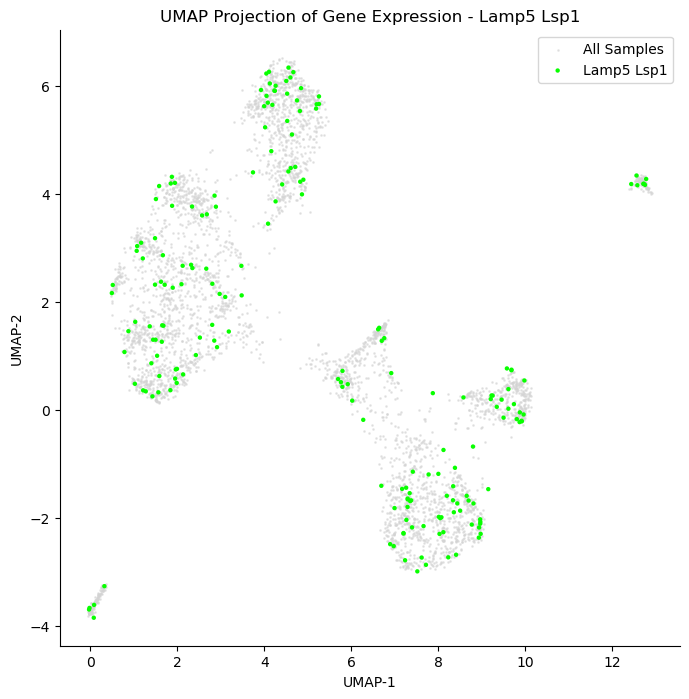

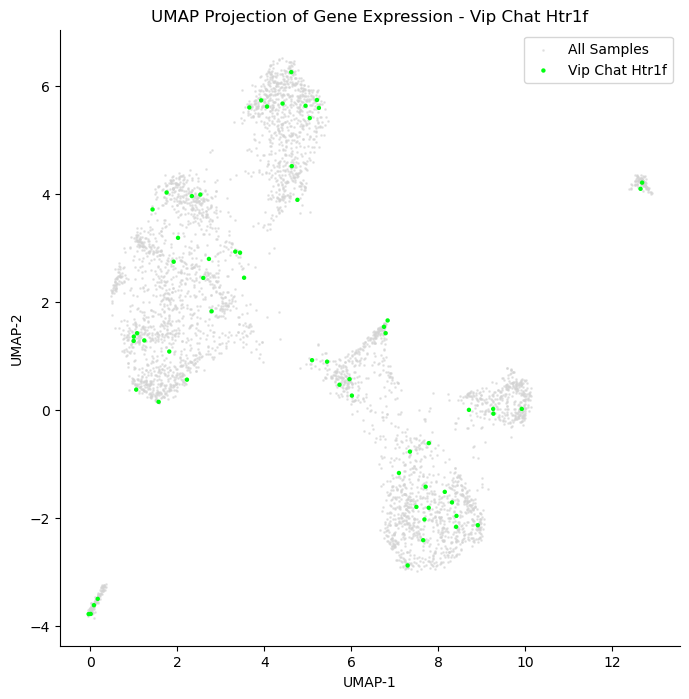

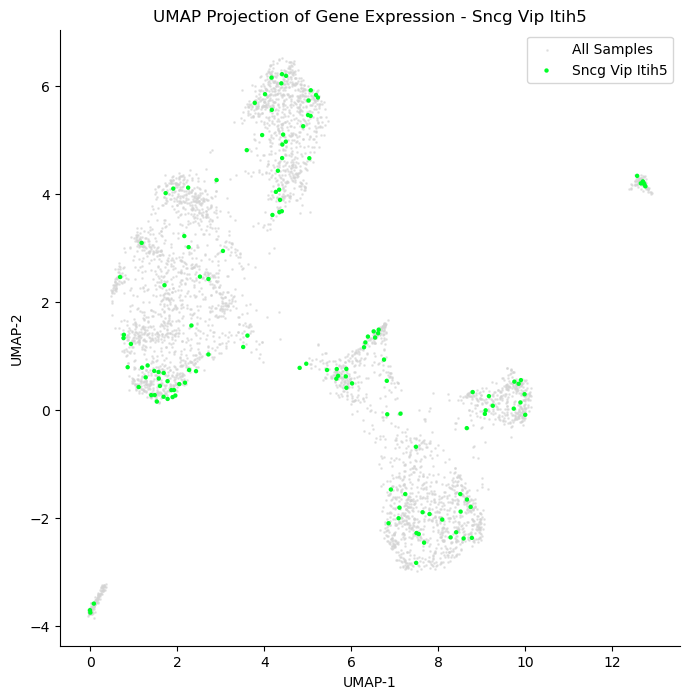

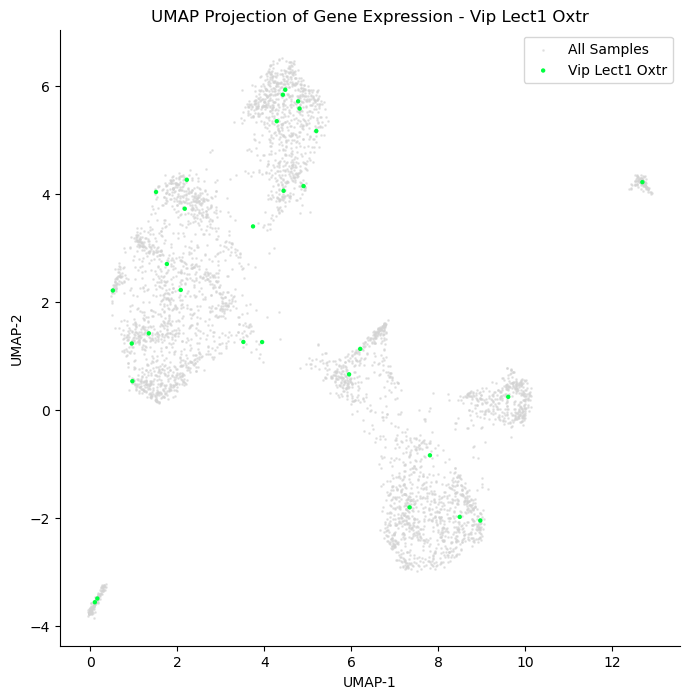

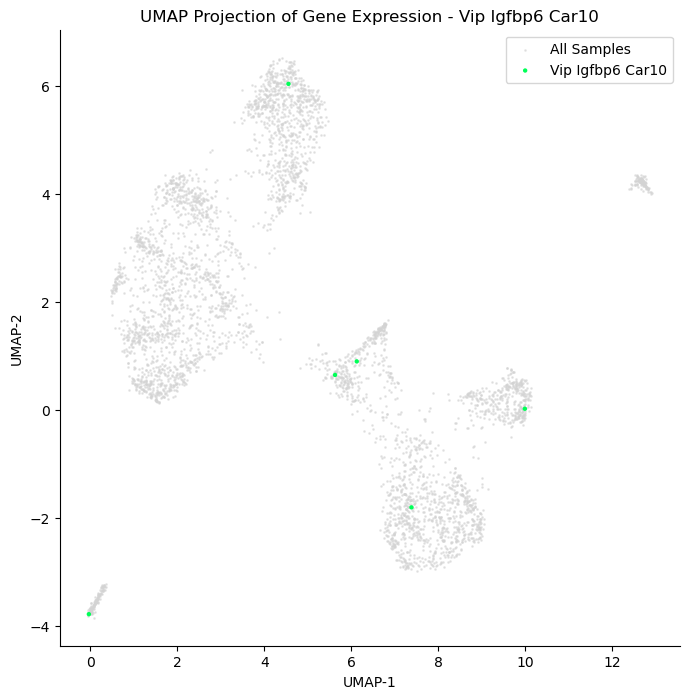

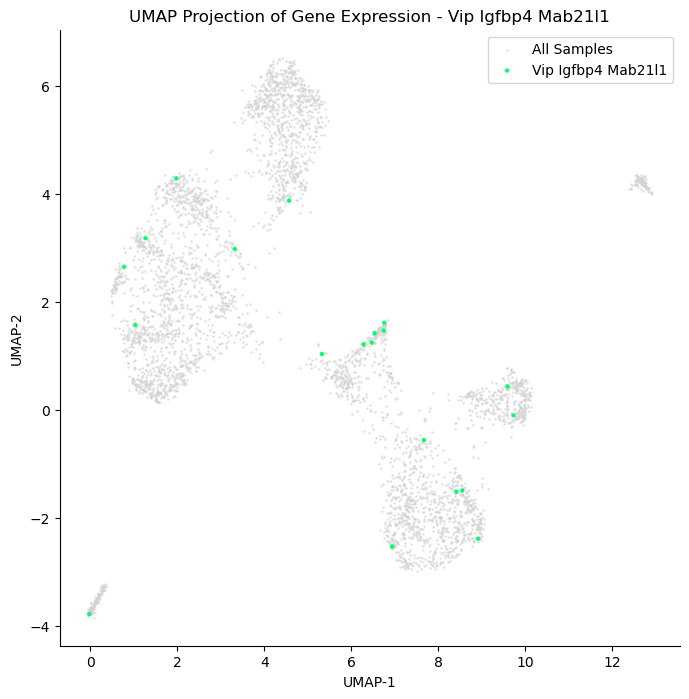

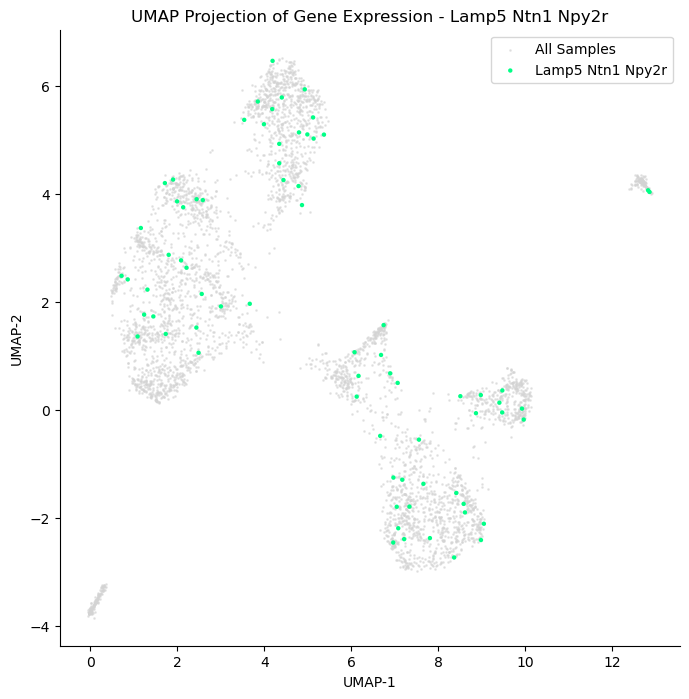

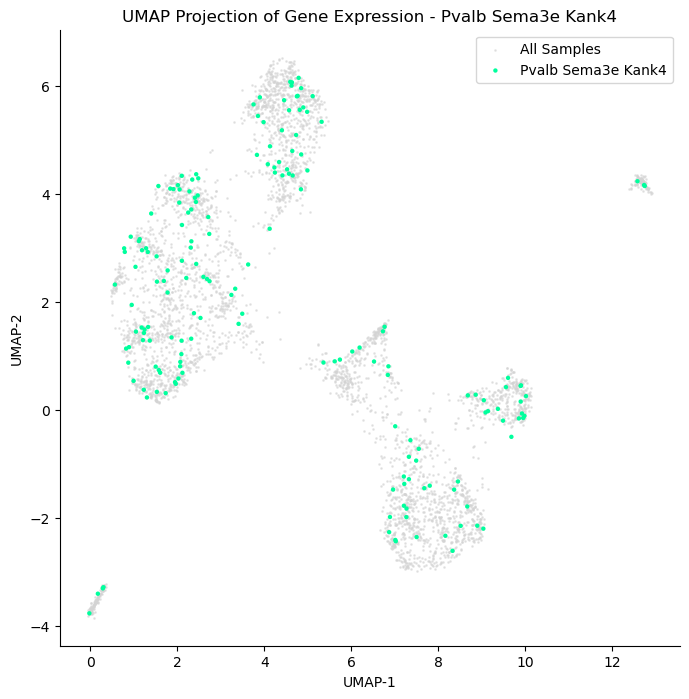

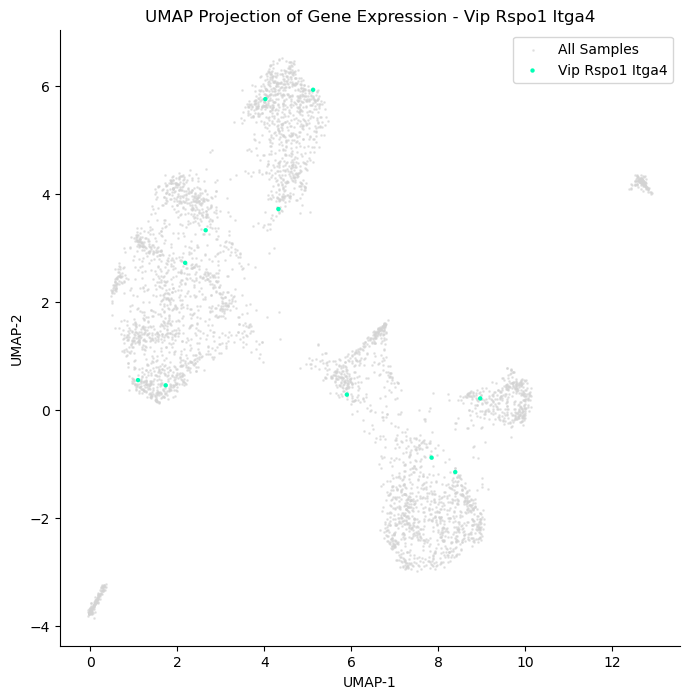

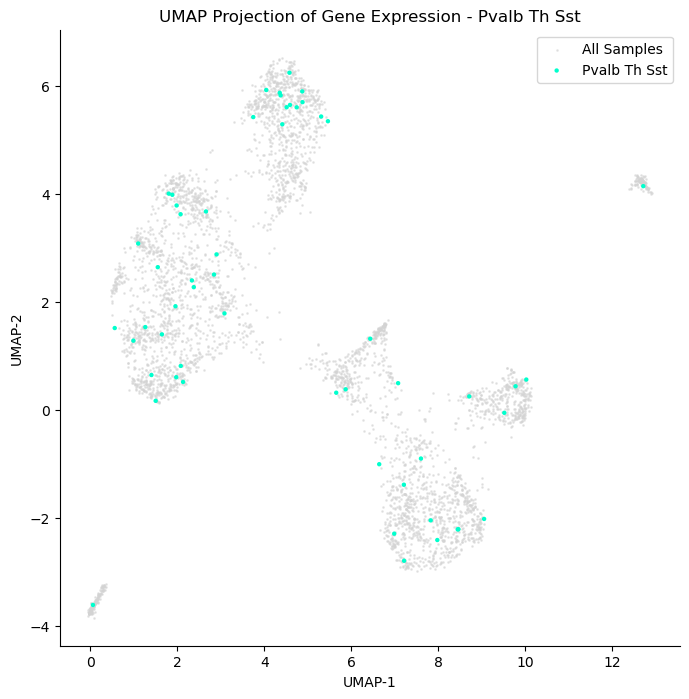

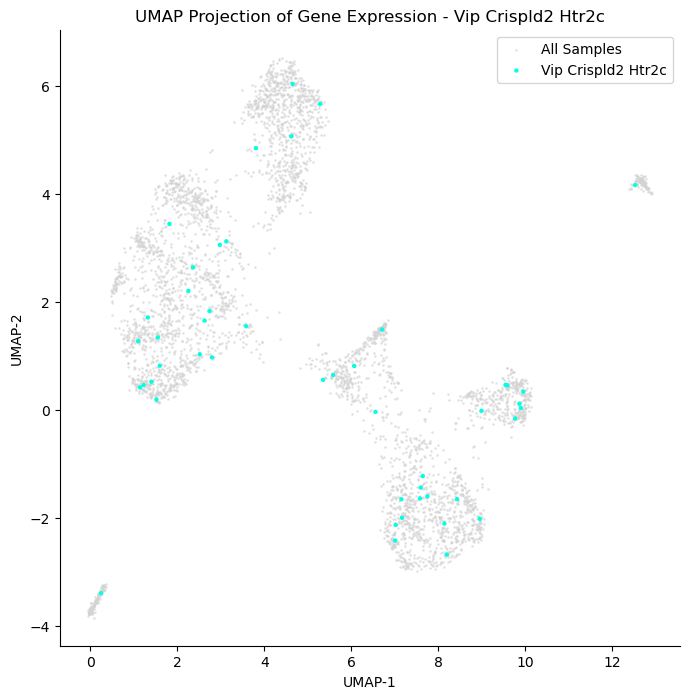

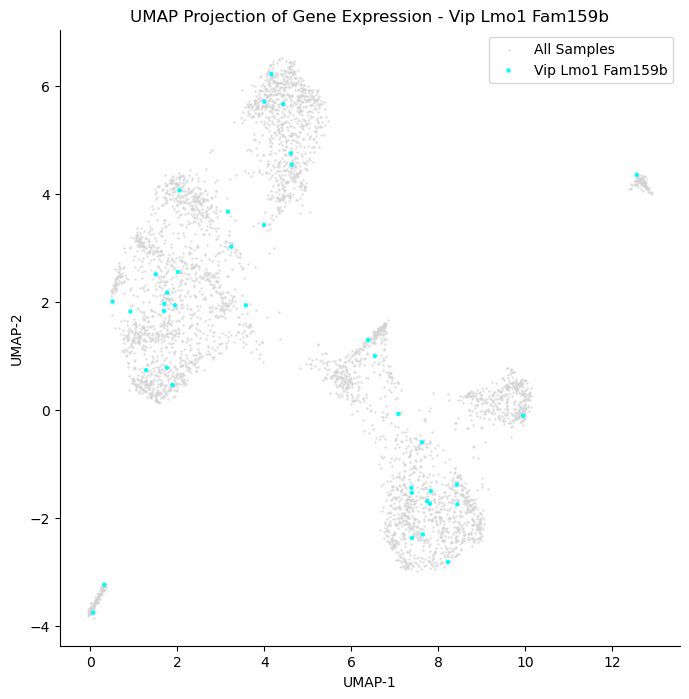

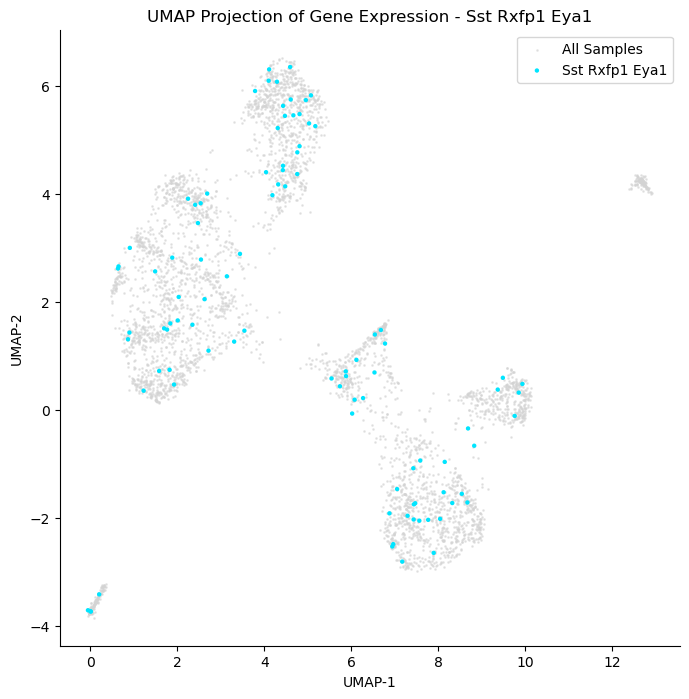

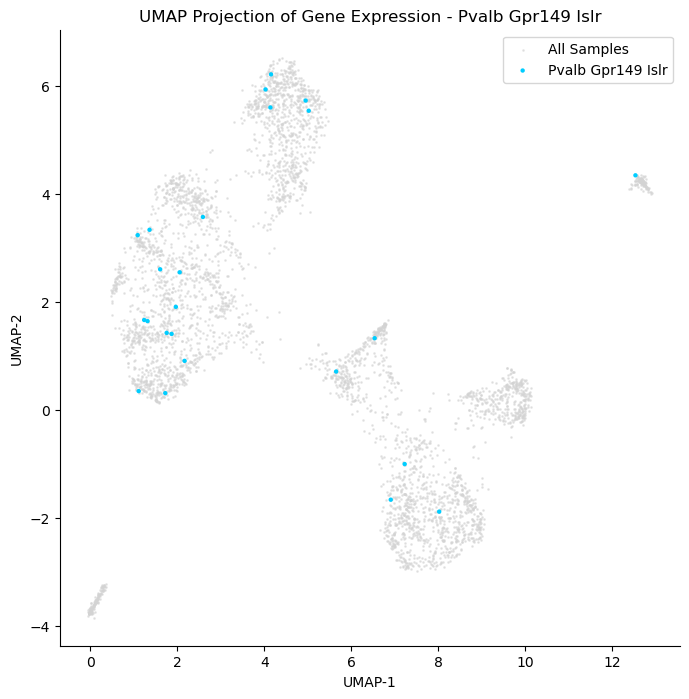

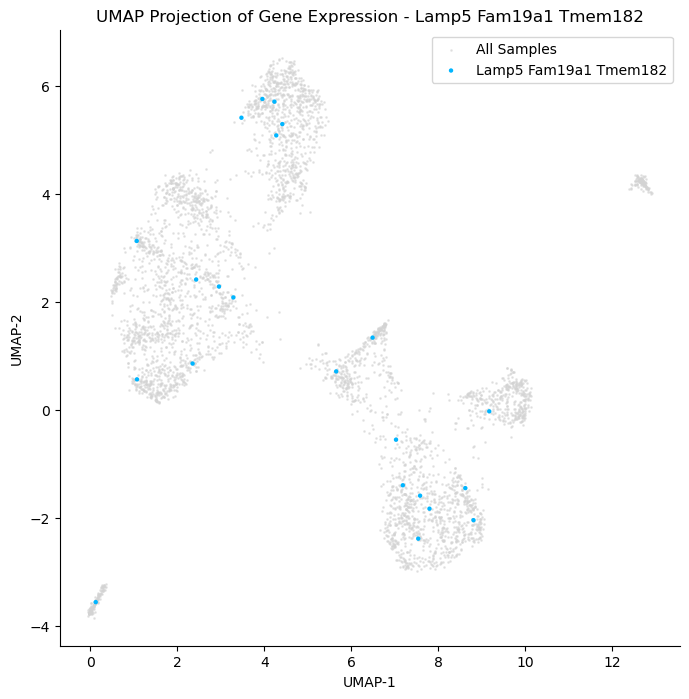

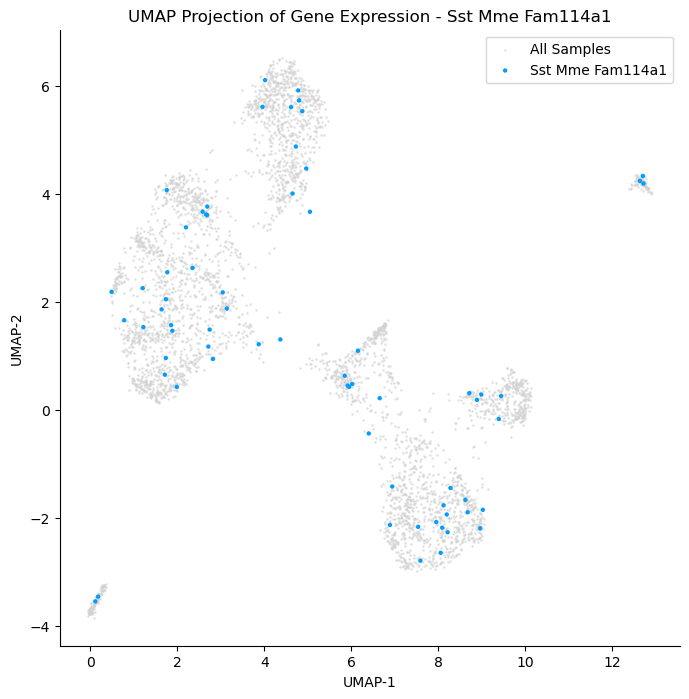

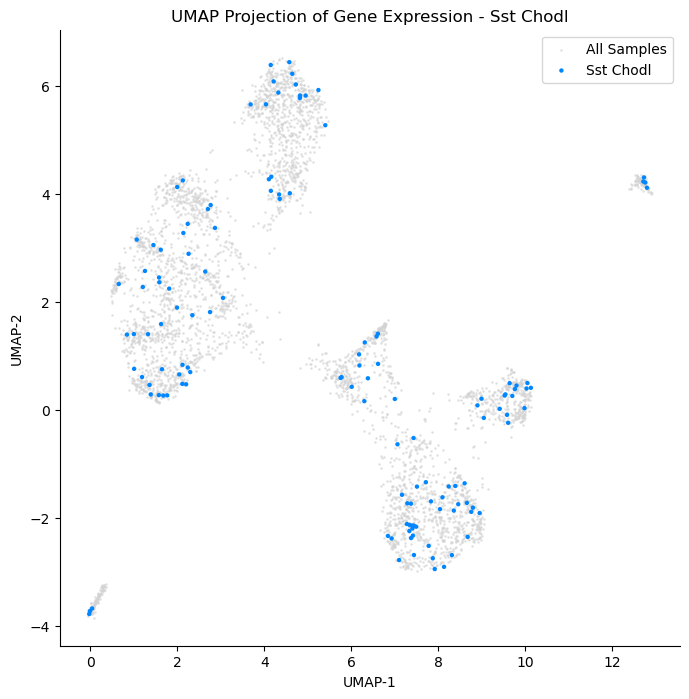

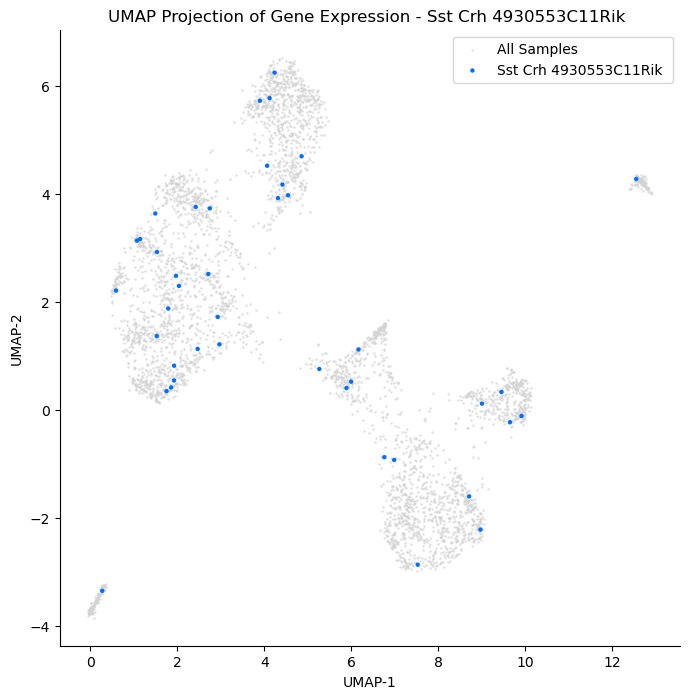

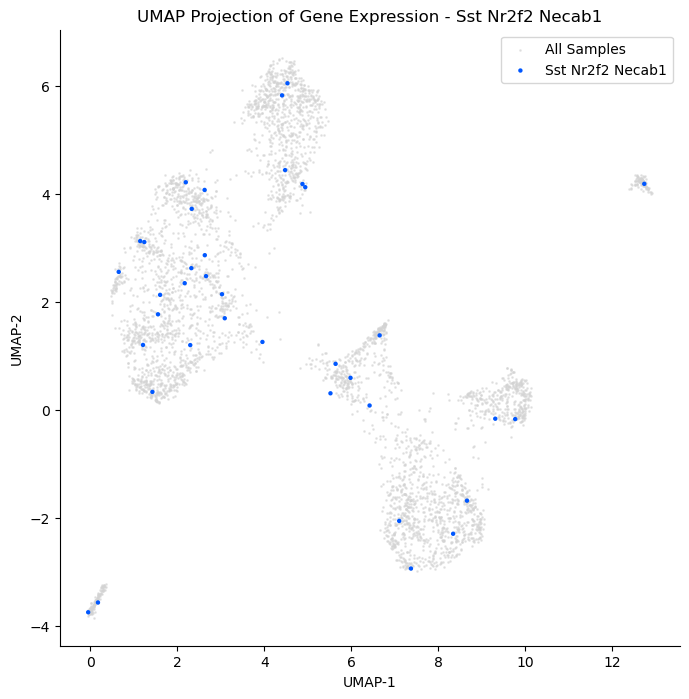

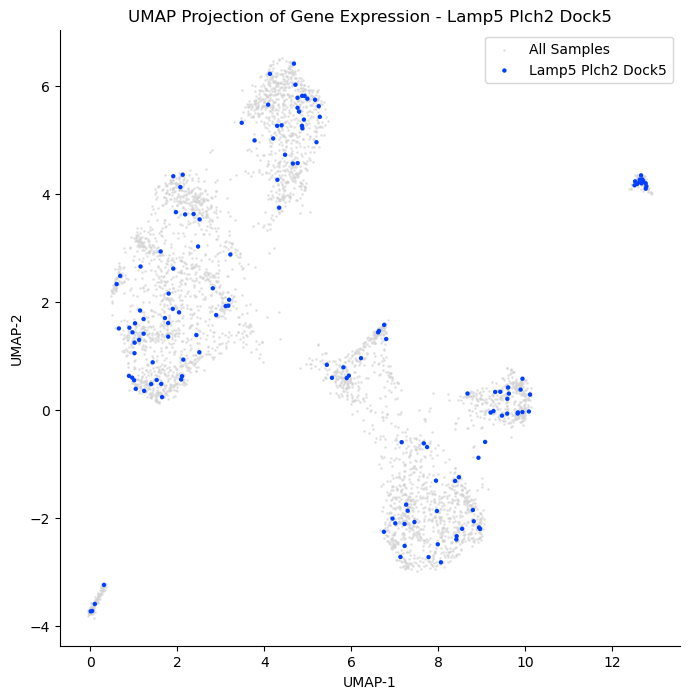

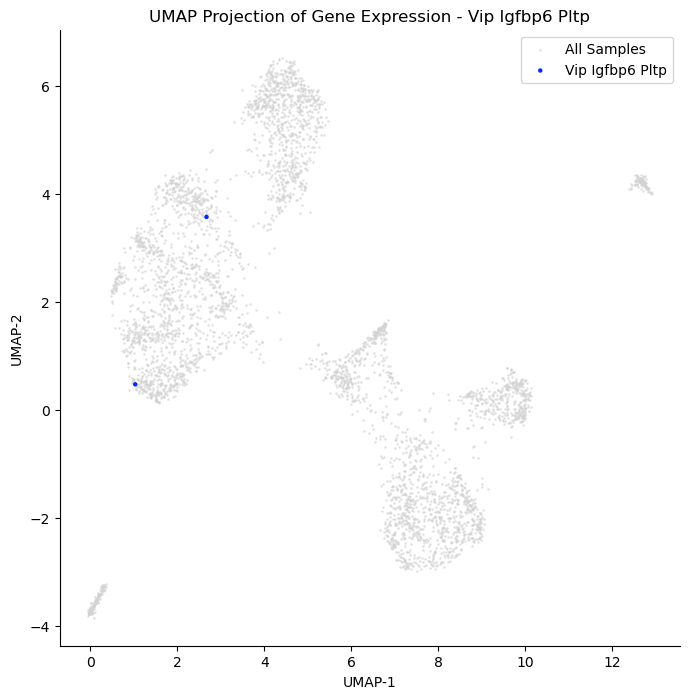

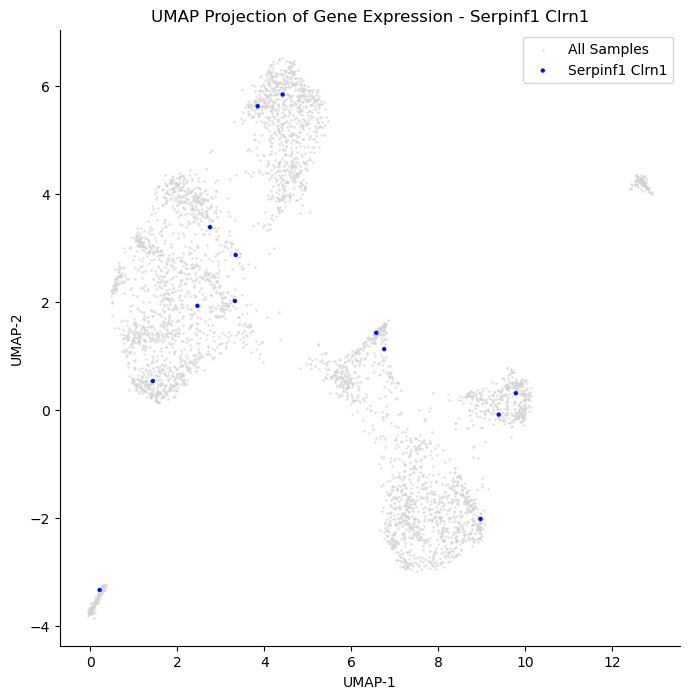

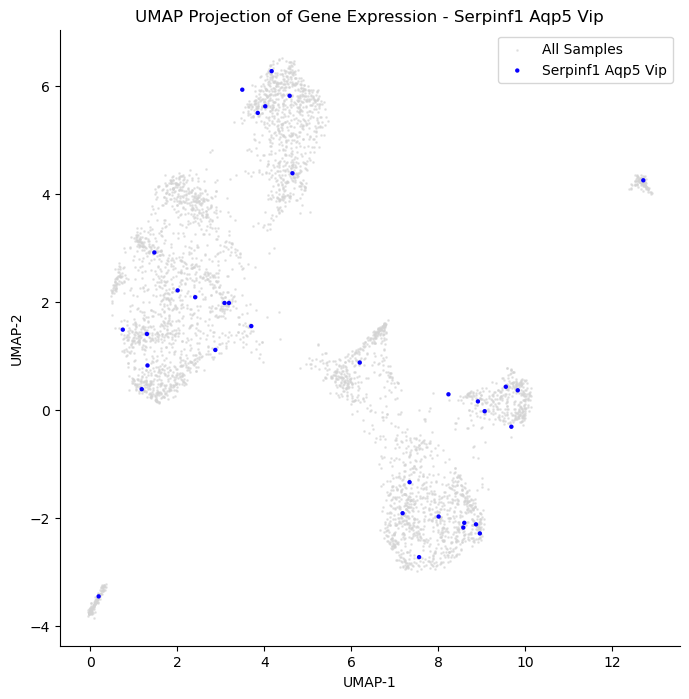

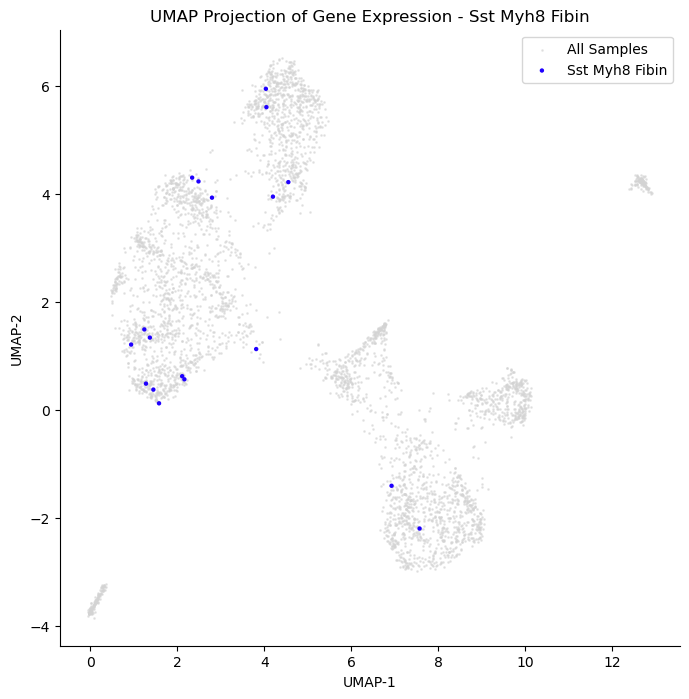

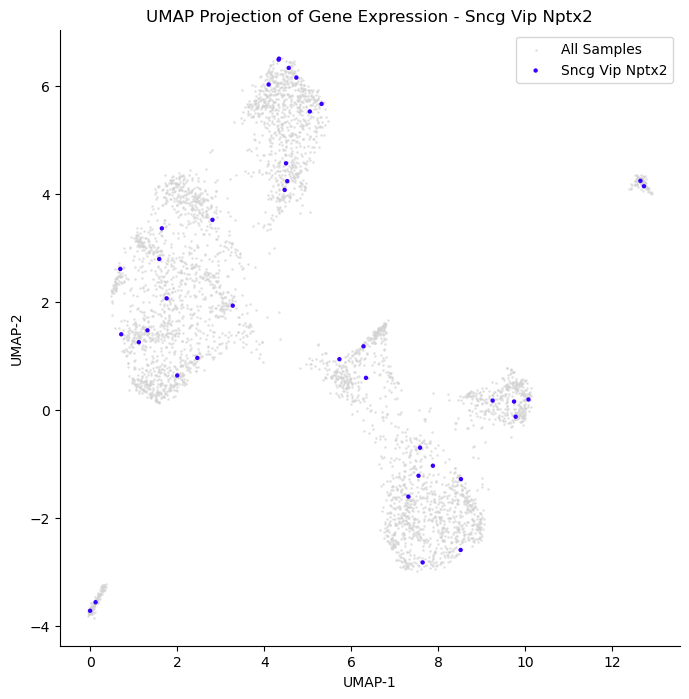

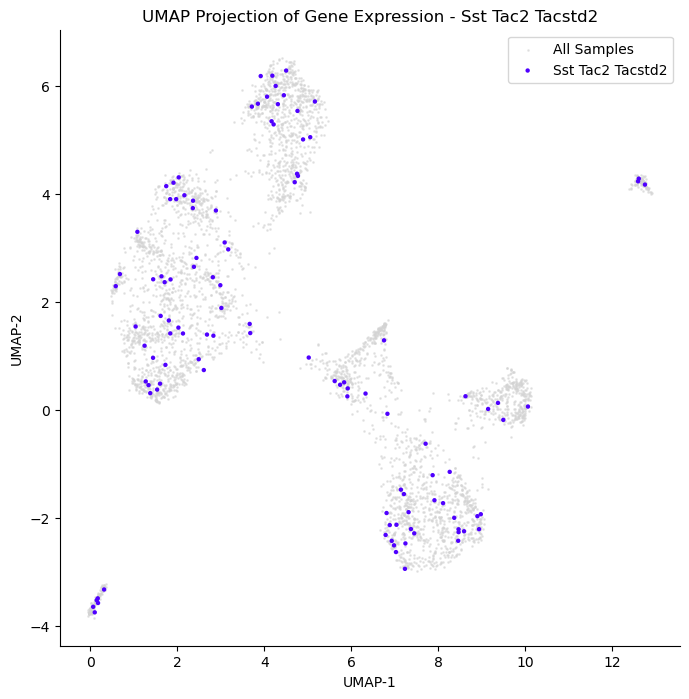

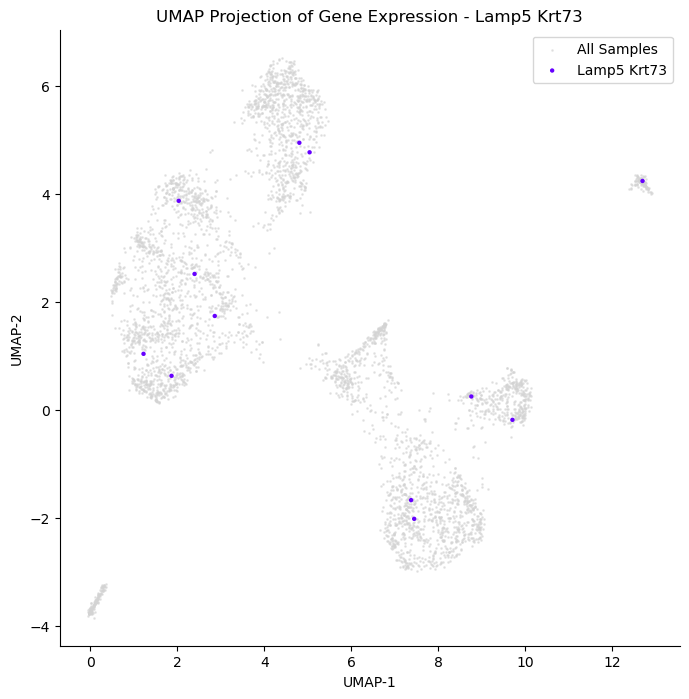

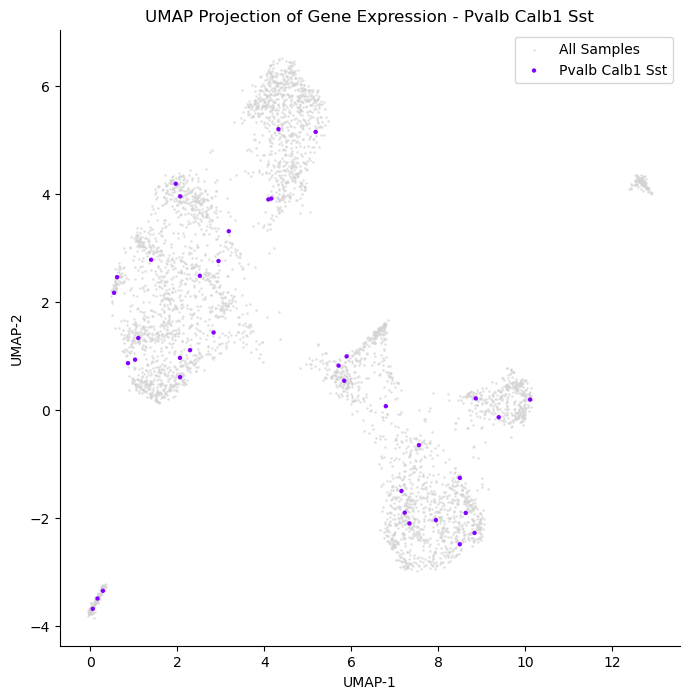

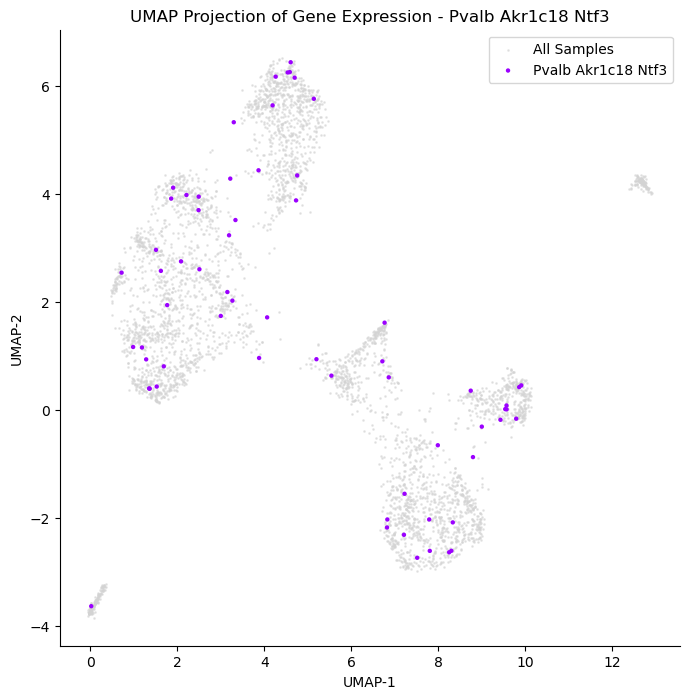

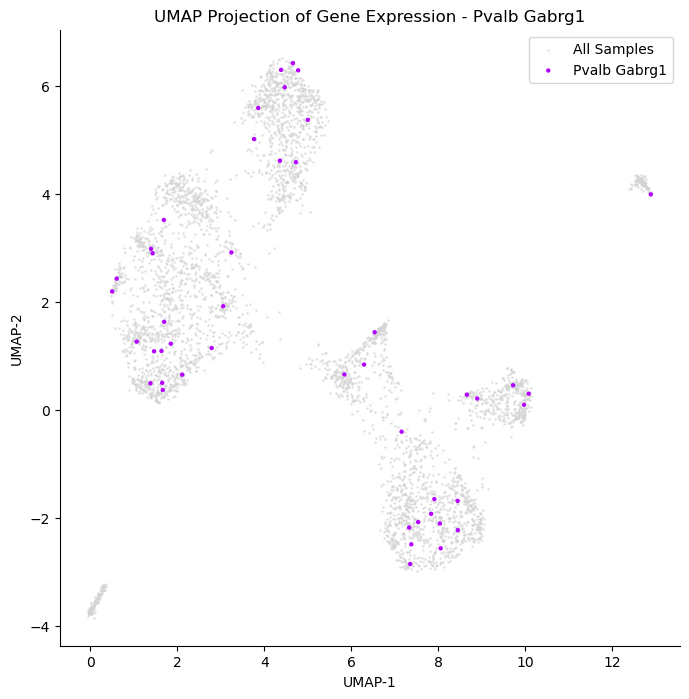

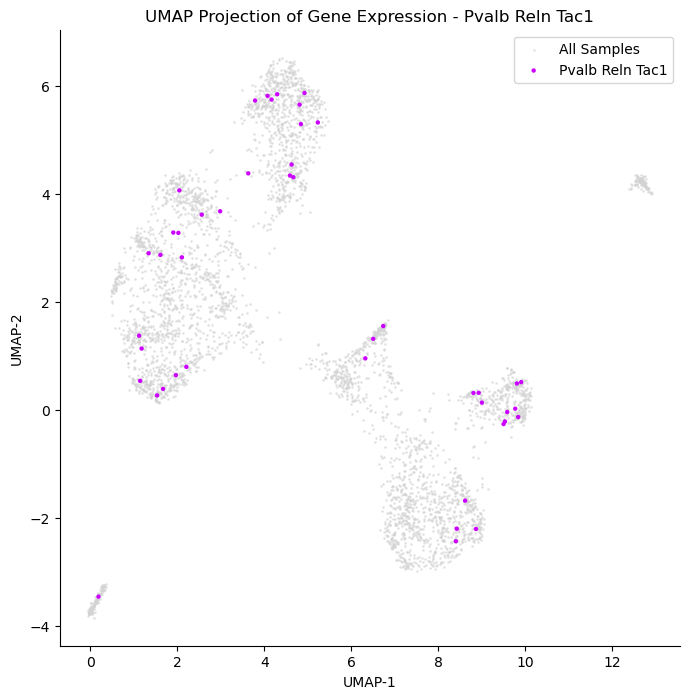

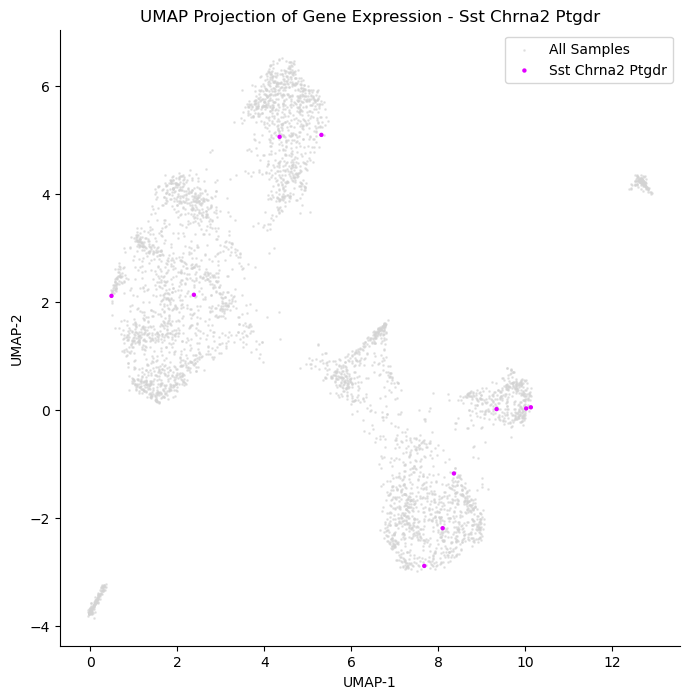

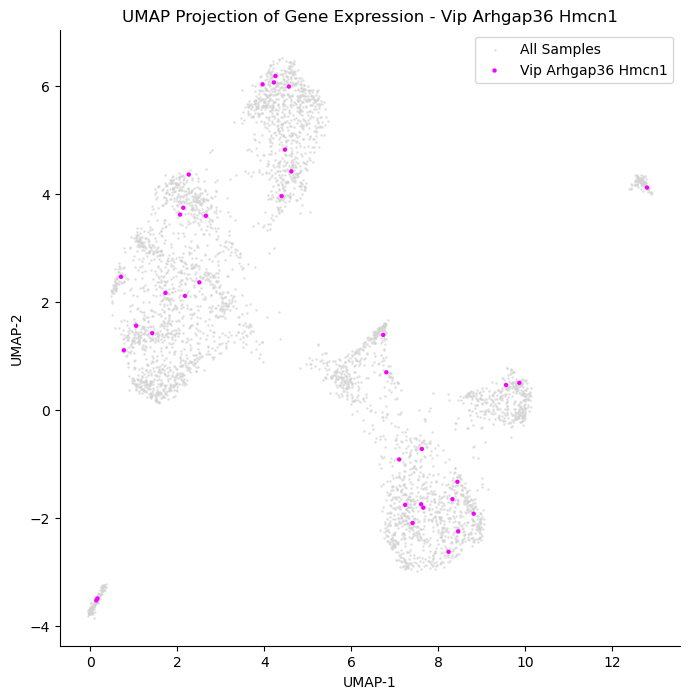

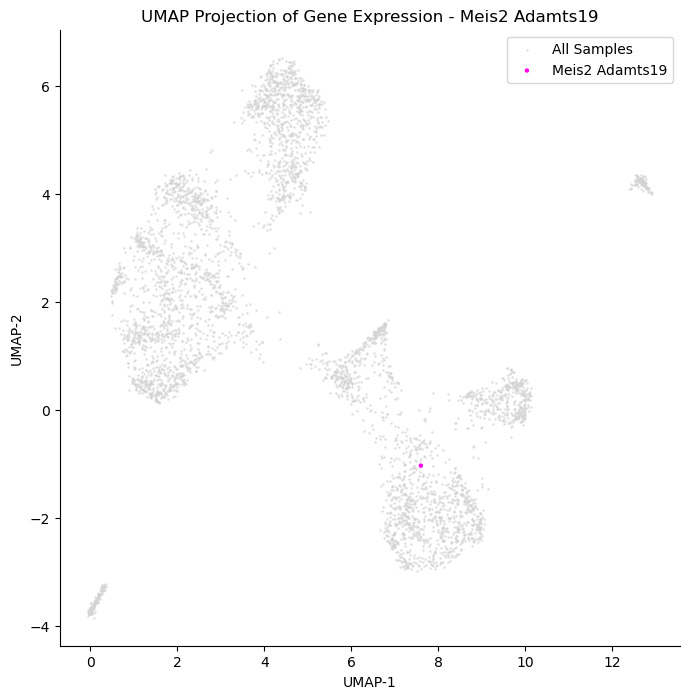

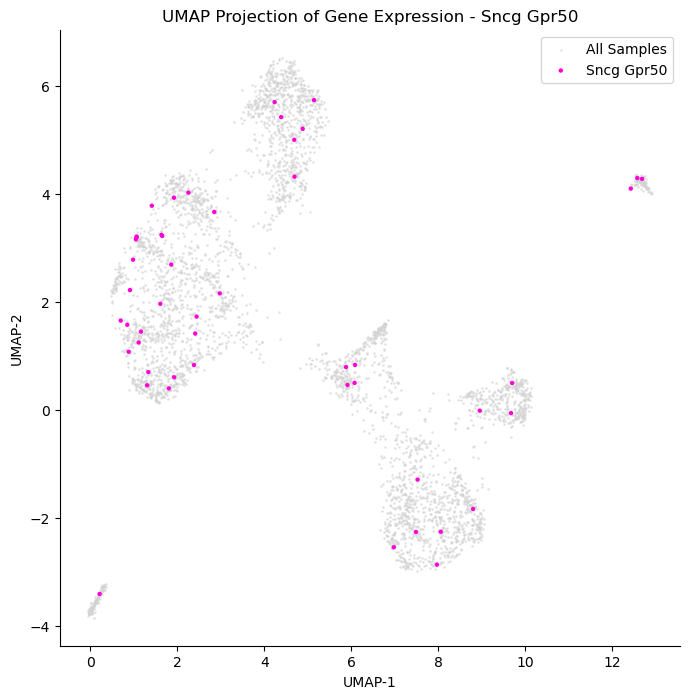

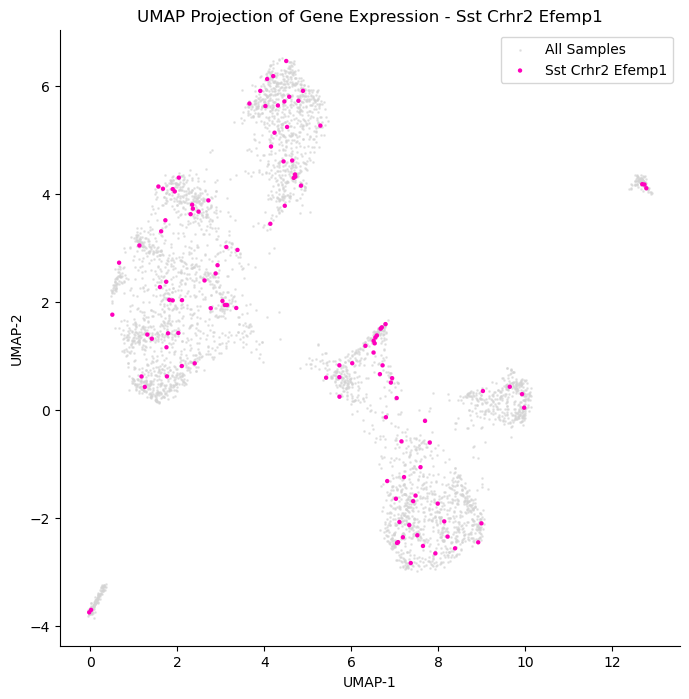

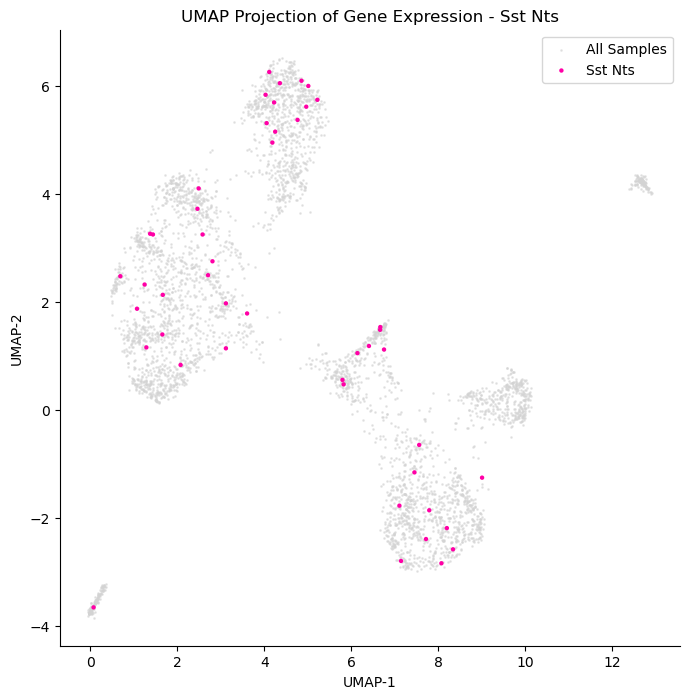

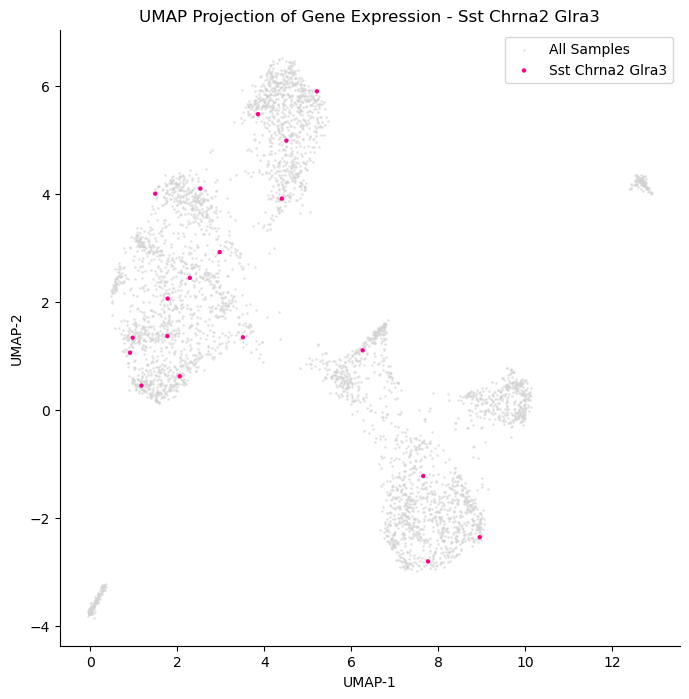

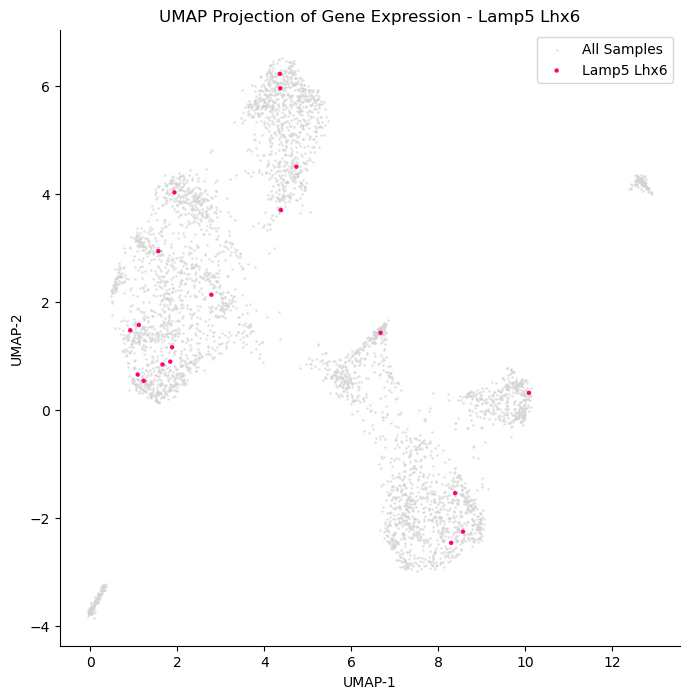

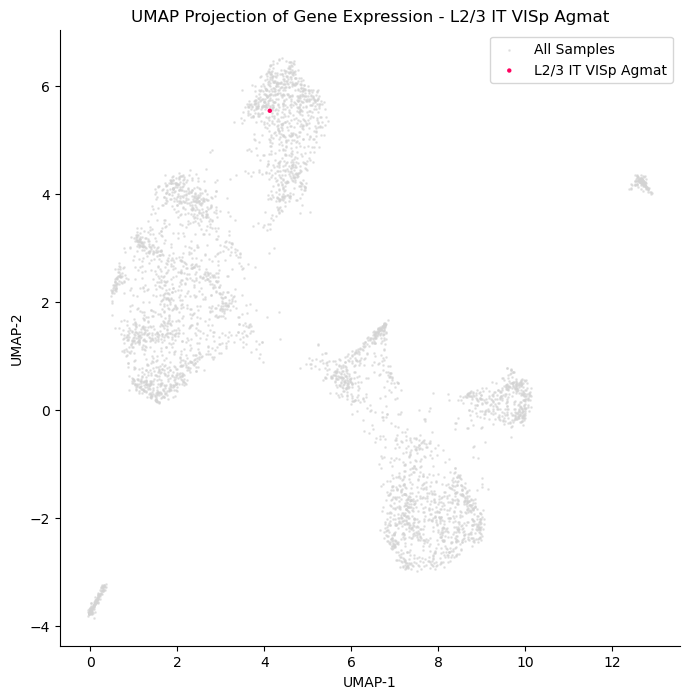

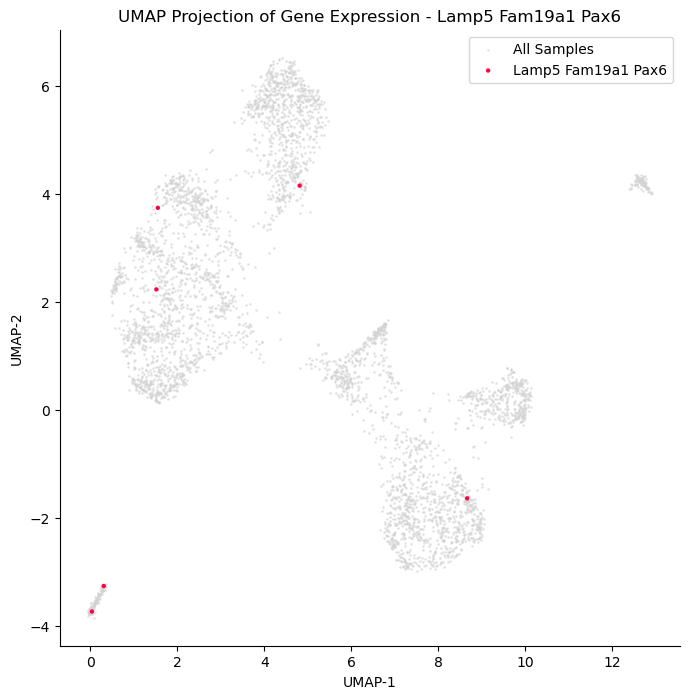

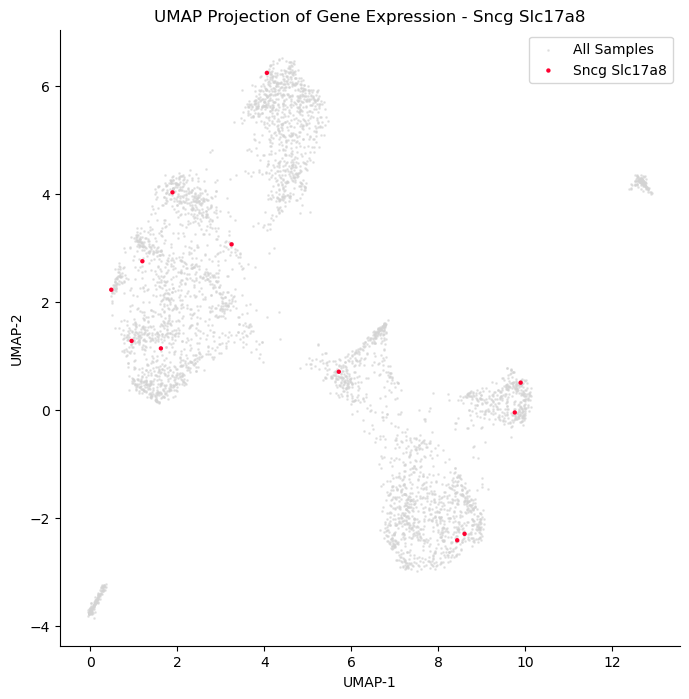

In [28]:
for t_type in unique_t_types:
    # 创建一个布尔数组，表示每个样本是否属于当前 T-type
    sample_mask = metadata['T-type Label'] == t_type

    # 绘图
    plt.figure(figsize=(8, 8))
    # 绘制所有样本的背景
    plt.scatter(embedding[:, 0], embedding[:, 1], s=1, color='lightgray', alpha=0.5, label='All Samples')
    # 绘制特定 T-type 的样本
    plt.scatter(embedding[sample_mask, 0], embedding[sample_mask, 1], color=t_type_to_color[t_type], s=10, edgecolor='none', label=f'{t_type}')

    plt.title(f'UMAP Projection of Gene Expression - {t_type}')
    plt.xlabel('UMAP-1')
    plt.ylabel('UMAP-2')
    plt.legend()
    sns.despine()  # 使用 seaborn 的 despine 函数去除边框
    plt.show()


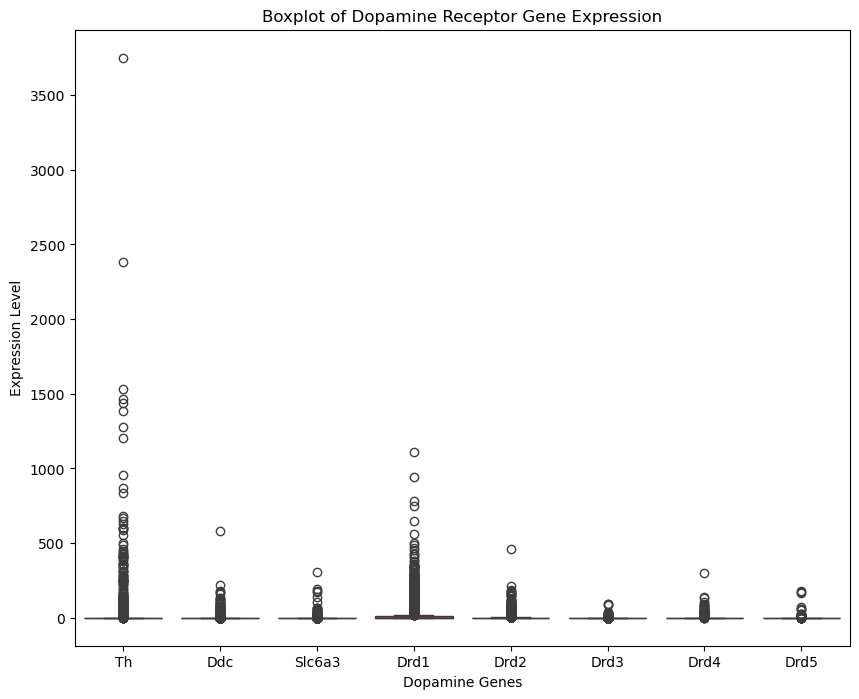

In [44]:
dopamine_expression = dopamine_expression.transpose()  # 转置，使基因成为列，便于绘制箱线图
plt.figure(figsize=(10, 8))
sns.boxplot(data=dopamine_expression)
plt.title('Boxplot of Dopamine Receptor Gene Expression')
plt.xlabel('Dopamine Genes')
plt.ylabel('Expression Level')
plt.show()


In [45]:
my_ttype_with_recon_metadata = metadata.loc[
    (metadata["T-type Label"] == "Pvalb Gabrg1") &
    (metadata["neuron_reconstruction_type"].isin(["full"])),
    :]

In [46]:
my_ttype_with_recon_metadata.iloc[0, :]

cell_specimen_id                                      669072736
cell_specimen_name            Sst-IRES-Cre;Ai14-376206.04.02.02
hemisphere                                                right
structure                                                VISp6a
donor_id                                                 376206
donor_name                             Sst-IRES-Cre;Ai14-376206
biological_sex                                                F
age                                                         P58
ethnicity                                                   NaN
medical_conditions                                          NaN
full_genotype                  Sst-IRES-Cre/wt;Ai14(RCL-tdT)/wt
dendrite_type                                            aspiny
apical_dendrite_status                                      NaN
neuron_reconstruction_type                                 full
cell_soma_normalized_depth                             0.832686
depth_from_pia_um                       

In [47]:
my_specimen_id = my_ttype_with_recon_metadata.iloc[0, :]["cell_specimen_id"]

nwb_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "nwb"),
    :
]

In [48]:
nwb_urls["archive_uri"].values[0]

'https://api.dandiarchive.org/api/assets/0f563bbd-79f0-4ae3-a511-1314515ef365/download/'

In [49]:
nwb_path = nwb_urls["file_name"].values[0]
nwb_path

'sub-666414034_ses-669072632_icephys.nwb'

In [51]:
import requests

# 文件下载的URL
url = 'https://api.dandiarchive.org/api/assets/0f563bbd-79f0-4ae3-a511-1314515ef365/download/'

# 使用 requests 库进行HTTP GET请求
response = requests.get(url)

# 检查HTTP响应状态是否为200（OK）
if response.status_code == 200:
    # 定义文件保存路径和文件名
    filename = "sub-666414034_ses-669072632_icephys.nwb"  # 你可以在这里修改路径，例如 '/path/to/your/directory/filename.nwb'
    
    # 打开文件以写入二进制数据
    with open(filename, 'wb') as f:
        f.write(response.content)  # 写入文件内容
    print("文件下载成功，保存为：", filename)
else:
    # 如果HTTP请求失败，打印错误状态码
    print("下载失败，状态码：", response.status_code)


文件下载成功，保存为： sub-666414034_ses-669072632_icephys.nwb


In [52]:
swc_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "transformed_swc"),
    :
]

In [53]:
swc_urls["archive_uri"].values[0]

'ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/669072736_transformed.swc'

In [ ]:
from ftplib import FTP

def download_file(ftp_server, ftp_port, ftp_path, filename):
    ftp = FTP()
    ftp.connect(ftp_server, ftp_port)
    ftp.login()
    ftp.cwd(ftp_path)
    
    with open(filename, 'wb') as file:
        ftp.retrbinary(f"RETR {filename}", file.write)
    
    ftp.quit()

# FTP server details
ftp_server = "download.brainlib.org"
ftp_port = 8811
ftp_path = "biccn/zeng/pseq/morph/200526"
filename = "669072736_transformed.swc"

# Download the file
download_file(ftp_server, ftp_port, ftp_path, filename)

print("File downloaded successfully.")


In [145]:
# Suppose 'gene_data' has been loaded as a DataFrame, indexed as the gene name, and listed as the sample
selected_genes = ['Th', 'Ddc', 'Slc6a3', 'Drd1', 'Drd2', 'Drd3', 'Drd4', 'Drd5']
filtered_data = gene_data.loc[selected_genes]

# Calculate the correlation matrix
correlation_matrix = filtered_data.transpose().corr()


C:\Users\75976\AppData\Local\Temp\ipykernel_27704\2977070133.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




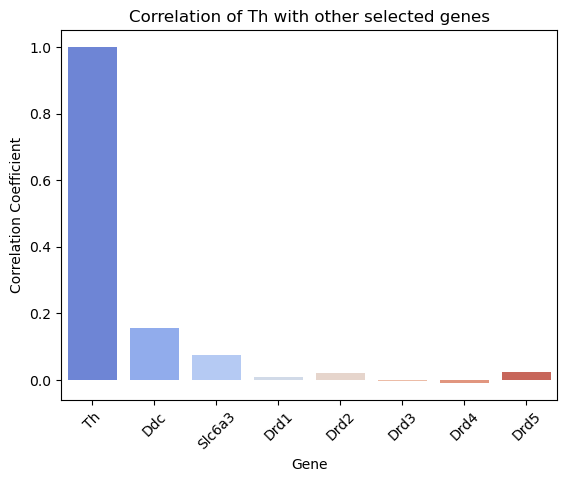

In [146]:
import seaborn as sns
# Set the correlation threshold
sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.loc['Th'], palette='coolwarm')
plt.title('Correlation of Th with other selected genes')
plt.xlabel('Gene')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


In [148]:
import pandas as pd


correlation_with_drd1 = gene_data.transpose().corrwith(gene_data.loc['Drd1'])


In [162]:
# Set the correlation threshold
threshold = 0.188
highly_related_genes = correlation_with_drd1[abs(correlation_with_drd1) > threshold]


In [163]:
print("Genes highly related to Drd1:")
print(highly_related_genes.sort_values(ascending=False))


Genes highly related to Drd1:
Drd1            1.000000
Serpina4-ps1    0.256826
Uncx            0.243256
Gm33291         0.231838
Gm35576         0.231340
Slc4a4          0.221742
Kcnc1           0.209722
Gdpgp1          0.200836
Inpp5j          0.200492
Prss23          0.199537
Gabrd           0.199119
Gm30144         0.198038
Tuba8           0.195356
Gm13629         0.194628
Fgf23           0.188660
Dsc3            0.188498
dtype: float64


C:\Users\75976\AppData\Local\Temp\ipykernel_27704\1015487769.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




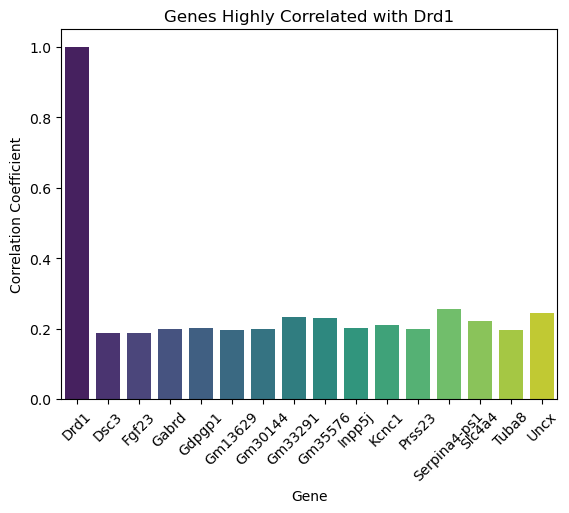

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Draw a correlation bar chart
sns.barplot(x=highly_related_genes.index, y=highly_related_genes.values, palette="viridis")
plt.title('Genes Highly Correlated with Drd1')
plt.xlabel('Gene')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


C:\Users\75976\AppData\Local\Temp\ipykernel_27704\1949582387.py:41: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



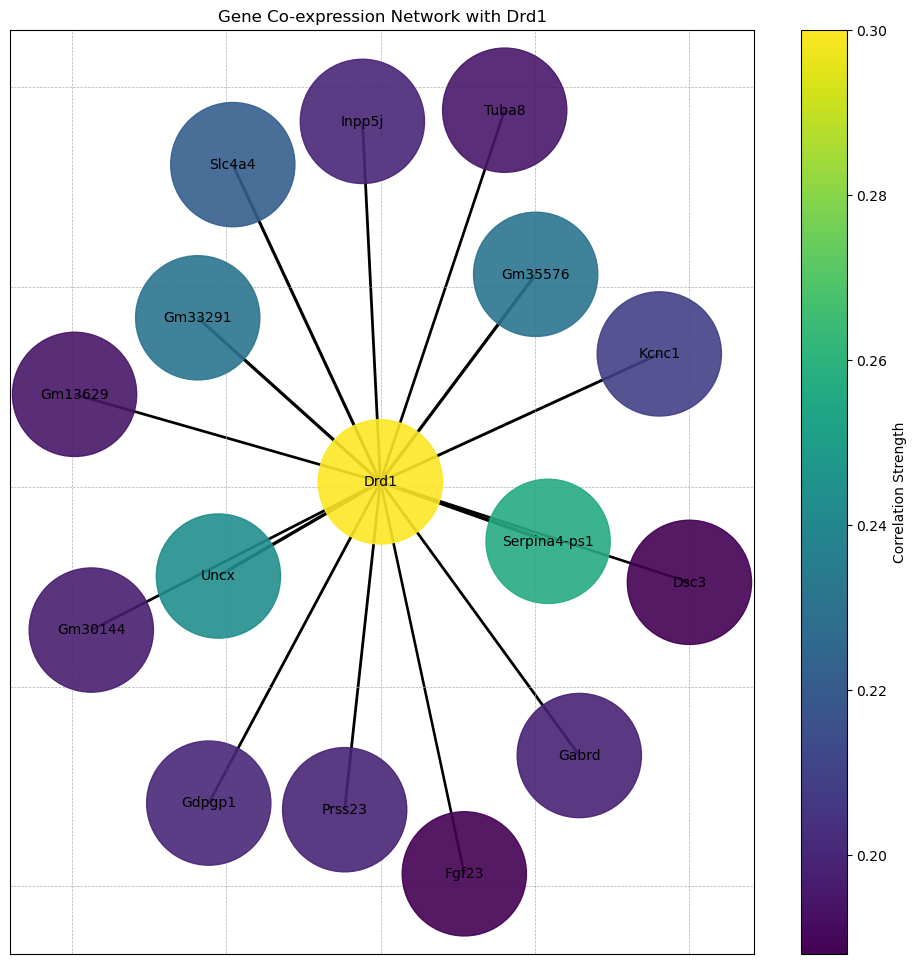

In [181]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np


data = {
    'Gene': ['Drd1', 'Serpina4-ps1', 'Uncx', 'Gm33291', 'Gm35576', 'Slc4a4', 'Kcnc1',
             'Gdpgp1', 'Inpp5j', 'Prss23', 'Gabrd', 'Gm30144', 'Tuba8',
             'Gm13629', 'Fgf23', 'Dsc3'],
    'Correlation': [1.000000, 0.256826, 0.243256, 0.231838, 0.231340, 0.221742,
                    0.209722, 0.200836, 0.200492, 0.199537, 0.199119,
                    0.198038, 0.195356, 0.194628, 0.188660, 0.188498]
}
df = pd.DataFrame(data)
df.set_index('Gene', inplace=True)


G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(index, correlation=row['Correlation'])
    if index != 'Drd1':
        G.add_edge('Drd1', index, weight=row['Correlation'])


pos = nx.spring_layout(G, seed=42)


plt.figure(figsize=(12, 12))
correlation_values = np.array([G.nodes[data]['correlation'] for data in G.nodes])
node_colors = np.interp(correlation_values, (0.188, 0.3), (0, 1))
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.viridis, 
                               node_size=8000, alpha=0.9)
edges = nx.draw_networkx_edges(G, pos, width=[data['weight']*10 for _, _, data in G.edges(data=True)])
labels = nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Gene Co-expression Network with Drd1")


sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0.188, vmax=0.3))
sm._A = []
plt.colorbar(sm, label='Correlation Strength')


plt.grid(True, linestyle='--', linewidth=0.5)  # 添加网格
plt.axis('on')  # 显示坐标轴
plt.show()
